In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

#sns.set_context('talk')
#sns.set_style('darkgrid')
#sns.set_palette('tab10')

In [3]:
# As vezes é necessário usar outra decodificação encoding = "ISO-8859-1"
tuberculose = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/tuberculose_ano_mes_diagnostico.csv',
                    sep=';',
                    skiprows=3,
                    skipfooter=16,
                    engine='python',encoding='ISO-8859-1')

In [4]:
tuberculose.to_csv('dados_tuberculose.csv', index=False)

In [5]:
tuberculose.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  20 non-null     object
 1   Jan              20 non-null     int64 
 2   Fev              20 non-null     int64 
 3   Mar              20 non-null     int64 
 4   Abr              20 non-null     int64 
 5   Mai              20 non-null     int64 
 6   Jun              20 non-null     int64 
 7   Jul              20 non-null     int64 
 8   Ago              20 non-null     int64 
 9   Set              20 non-null     int64 
 10  Out              20 non-null     int64 
 11  Nov              20 non-null     int64 
 12  Dez              20 non-null     int64 
 13  Total            20 non-null     int64 
dtypes: int64(13), object(1)
memory usage: 2.3+ KB


transformar os dados em uma série com ano-mes, uma coluna com ano-mes e outra com o caso.

In [6]:
anos = tuberculose.iloc[:,0]

In [7]:
meses = tuberculose.columns[1:-1]

In [8]:
meses

Index(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out',
       'Nov', 'Dez'],
      dtype='object')

In [9]:
tuberculose.drop('Total',axis=1, inplace=True)

In [10]:
tuberculose = tuberculose.iloc[:19]

In [11]:
tuberculose.head()

,Ano Diagnóstico,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
0,2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
1,2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2,2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
3,2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
4,2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541


In [12]:
tuberculose_index_ano = tuberculose.set_index('Ano Diagnóstico')
tuberculose_index_ano.head()

,Jan,Fev,Mar,Abr,Mai,Jun,Jul,Ago,Set,Out,Nov,Dez
Ano Diagnóstico,,,,,,,,,,,,
2001,8088,6542,8095,7305,7656,6805,6987,8065,6697,7524,6874,6627
2002,8013,7346,7961,8771,7784,6713,7746,8330,7654,8200,7532,6809
2003,8115,7985,7474,7975,8024,7082,7949,7585,8136,8521,7624,7303
2004,7574,6743,8574,8089,7763,7314,7825,8232,7901,8016,7753,7196
2005,7432,6748,8441,7958,8019,7781,7282,8391,7690,7186,7587,7541


In [13]:
ano_mes = []
casos = []
for ano in tuberculose['Ano Diagnóstico']:
    for mes in tuberculose.columns[1:]:
        ano_mes.append(str(f'{ano}-{mes}'))
        casos.append(tuberculose_index_ano.loc[ano,mes])

casos_tuberculose_ano_mes = pd.DataFrame({
    'ANO_MES':ano_mes,
    'CASOS':casos
})

casos_tuberculose_ano_mes.head()

,ANO_MES,CASOS
0,2001-Jan,8088
1,2001-Fev,6542
2,2001-Mar,8095
3,2001-Abr,7305
4,2001-Mai,7656


Outra forma usando o `melt`

In [14]:
casos_tuberculose_ano_mes = tuberculose.melt(id_vars='Ano Diagnóstico', value_name='Casos', var_name='Mes')
casos_tuberculose_ano_mes['Data'] = casos_tuberculose_ano_mes['Ano Diagnóstico'] + '-' + casos_tuberculose_ano_mes['Mes']
casos_tuberculose_ano_mes

,Ano Diagnóstico,Mes,Casos,Data
0,2001,Jan,8088,2001-Jan
1,2002,Jan,8013,2002-Jan
2,2003,Jan,8115,2003-Jan
3,2004,Jan,7574,2004-Jan
4,2005,Jan,7432,2005-Jan
...,...,...,...,...
223,2015,Dez,6844,2015-Dez
224,2016,Dez,6672,2016-Dez
225,2017,Dez,7020,2017-Dez
226,2018,Dez,6900,2018-Dez


In [15]:
casos_tuberculose_ano_mes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano Diagnóstico  228 non-null    object
 1   Mes              228 non-null    object
 2   Casos            228 non-null    int64 
 3   Data             228 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.2+ KB


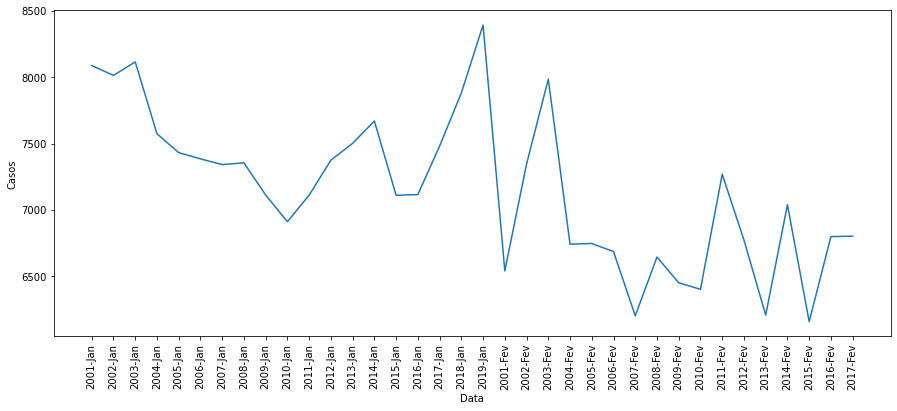

In [16]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Data', y='Casos', data=casos_tuberculose_ano_mes[:36])
plt.xticks(rotation=90)
plt.show()

### Para tratar as variáveis `Data` como uma data efetivamente

In [17]:
tuberculose.columns[1:-1]

Index(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out',
       'Nov'],
      dtype='object')

In [18]:
mapa_meses_pt_en = {
    'Jan':'Jan',
    'Fev':'Feb',
    'Mar':'Mar',
    'Abr':'Apr',
    'Mai':'May',
    'Jun':'Jan',
    'Jul':'Jul',
    'Ago':'Aug',
    'Set':'Sep',
    'Out':'Oct',
    'Nov':'Nov',
    'Dez':'Dec'
}

In [19]:
casos_tuberculose_ano_mes.Mes = casos_tuberculose_ano_mes.Mes.map(mapa_meses_pt_en)
casos_tuberculose_ano_mes.sample(5)

,Ano Diagnóstico,Mes,Casos,Data
136,2004,Aug,8232,2004-Ago
116,2003,Jul,7949,2003-Jul
55,2018,Mar,7901,2018-Mar
219,2011,Dec,6936,2011-Dez
37,2019,Feb,7754,2019-Fev


In [20]:
casos_tuberculose_ano_mes['Data'] = casos_tuberculose_ano_mes['Ano Diagnóstico'] + '-' + casos_tuberculose_ano_mes['Mes']
casos_tuberculose_ano_mes['Data'] = pd.to_datetime(casos_tuberculose_ano_mes['Data'])

casos_tuberculose_ano_mes = casos_tuberculose_ano_mes.sort_values('Data')
casos_tuberculose_ano_mes = casos_tuberculose_ano_mes[['Data', 'Casos']]
casos_tuberculose_ano_mes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 227
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Data    228 non-null    datetime64[ns]
 1   Casos   228 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 5.3 KB


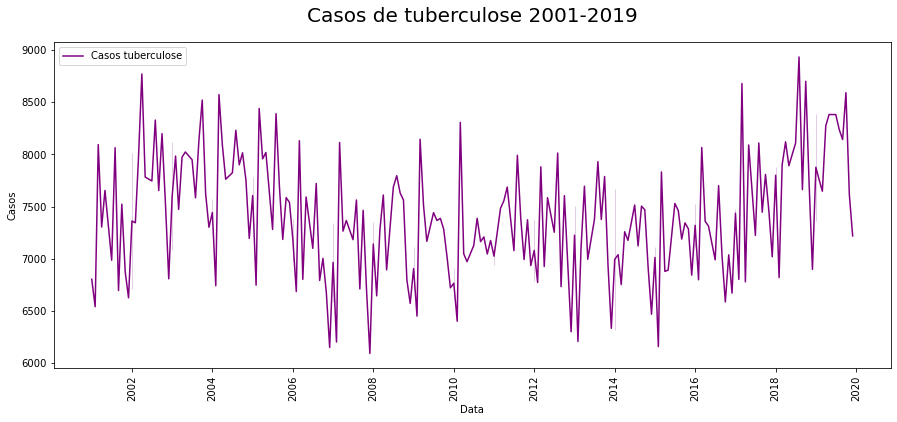

In [21]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Data', y='Casos', data=casos_tuberculose_ano_mes[1:], color='purple',label='Casos tuberculose')
plt.xticks(rotation=90)
plt.title('Casos de tuberculose 2001-2019', fontsize=20, pad=20)
plt.show()

In [22]:
casos_tuberculose_ano_mes

,Data,Casos
0,2001-01-01,8088
95,2001-01-01,6805
19,2001-02-01,6542
38,2001-03-01,8095
57,2001-04-01,7305
...,...,...
151,2019-08-01,8239
170,2019-09-01,8143
189,2019-10-01,8592
208,2019-11-01,7615


# Curiosidade: Pesquisar Sobre Espectro de Frequências

# Tendência de uma série temporal

Um jeito bem rápido de analisar uma tendência de uma séries é analisar a média móvel, $MM$(Média Móvel) ou $MA$(Move Average). Uma média móvel usa o mesmo conceito da estatistica básica da média amostral de $n$ elementos. Mas numa séries temporal estes $n$ elementos é menor que o número $N$ de dados da série.

Por exemplo, se temos uma série temporal de $N$ registros, então uma média móvel desta série será:

$$MA = \frac{1}{n}\sum_{i=0}^{n}{X_i},\text{ onde }n =1,2,3,...,N-1, \text{ tal que } n<N,$$

assim uma $MA$ permite analisar como se comporta um subconjunto das amostras através de uma média. Quando falamos **MA12** por exemplo, isso significa que é uma média móvel com uma janela de 12 elementos, ou seja a média será realizada a cada 12 elementos.


In [23]:
casos_tuberculose_ano_mes['MA3'] = casos_tuberculose_ano_mes['Casos'].rolling(3).mean()
casos_tuberculose_ano_mes.reset_index(drop=True, inplace=True)
casos_tuberculose_ano_mes

,Data,Casos,MA3
0,2001-01-01,8088,NaN
1,2001-01-01,6805,NaN
2,2001-02-01,6542,7145.000000
3,2001-03-01,8095,7147.333333
4,2001-04-01,7305,7314.000000
...,...,...,...
223,2019-08-01,8239,8334.666667
224,2019-09-01,8143,8254.666667
225,2019-10-01,8592,8324.666667
226,2019-11-01,7615,8116.666667


Note que os 12 primeiros elementos são `NaN` isso porque não foi computada a média para os primeiros elementos, justamente porque é uma $MA12$:

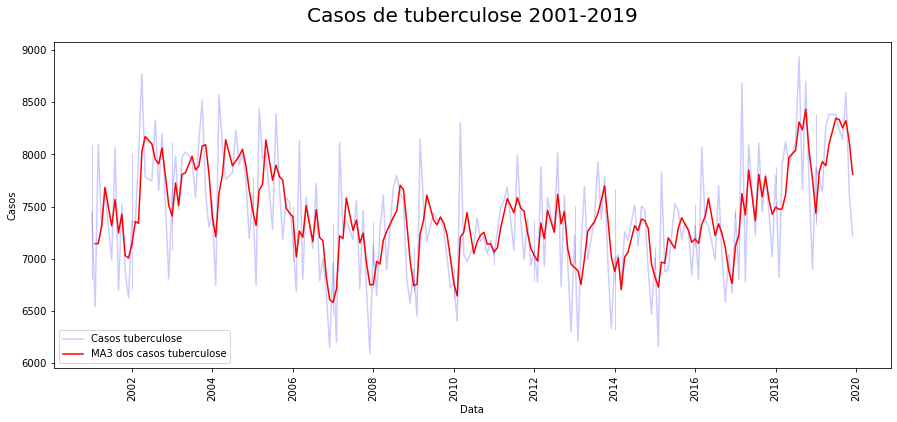

In [24]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Data', y='Casos', data=casos_tuberculose_ano_mes, color='blue',alpha=0.2,label='Casos tuberculose')
sns.lineplot(x='Data', y='MA3', data=casos_tuberculose_ano_mes, color='red',label='MA3 dos casos tuberculose')
plt.xticks(rotation=90)
plt.title('Casos de tuberculose 2001-2019', fontsize=20, pad=20)
plt.show()

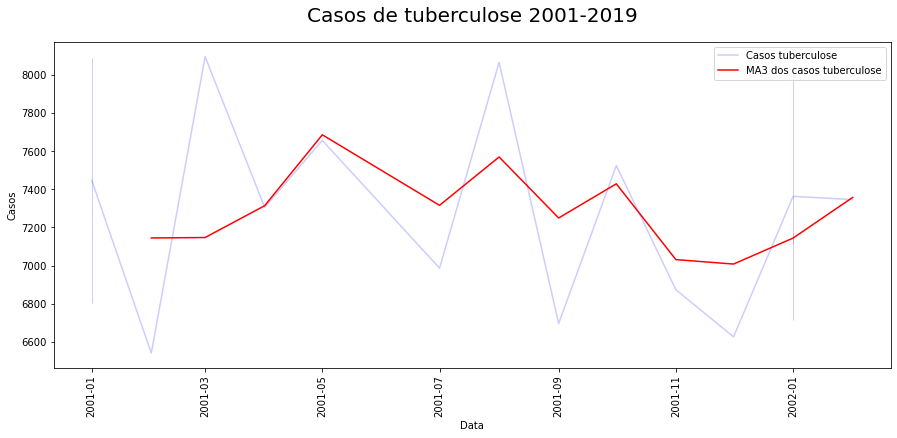

In [25]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Data', y='Casos', data=casos_tuberculose_ano_mes[:15], color='blue',alpha=0.2,label='Casos tuberculose')
sns.lineplot(x='Data', y='MA3', data=casos_tuberculose_ano_mes[:15], color='red',label='MA3 dos casos tuberculose')
plt.xticks(rotation=90)
plt.title('Casos de tuberculose 2001-2019', fontsize=20, pad=20)
plt.show()

Um ponto que deve ser salientado é a defasagem. Note que a linha vermelha começa um pouco depois dos dados em "roxo claro". A função `rolling()` tem um parametro chamado `center`

In [26]:
casos_tuberculose_ano_mes['MA3_Centrada'] = casos_tuberculose_ano_mes['Casos'].rolling(3, center=True).mean()
casos_tuberculose_ano_mes

,Data,Casos,MA3,MA3_Centrada
0,2001-01-01,8088,NaN,NaN
1,2001-01-01,6805,NaN,7145.000000
2,2001-02-01,6542,7145.000000,7147.333333
3,2001-03-01,8095,7147.333333,7314.000000
4,2001-04-01,7305,7314.000000,7685.333333
...,...,...,...,...
223,2019-08-01,8239,8334.666667,8254.666667
224,2019-09-01,8143,8254.666667,8324.666667
225,2019-10-01,8592,8324.666667,8116.666667
226,2019-11-01,7615,8116.666667,7809.000000


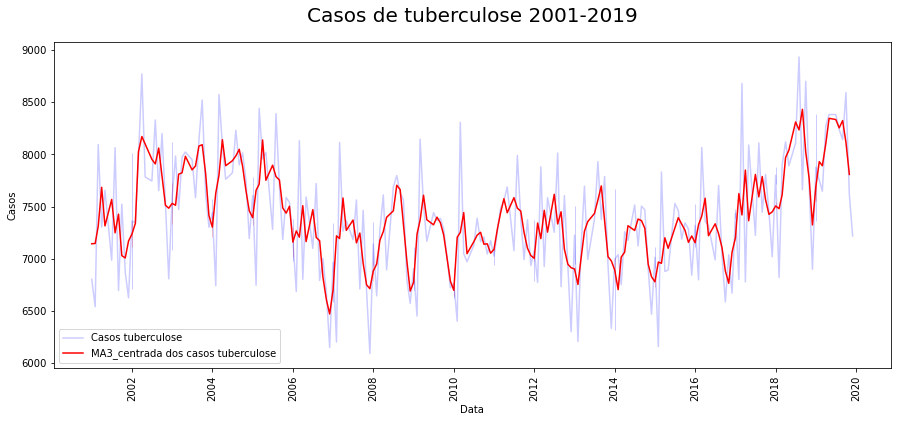

In [27]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Data', y='Casos', data=casos_tuberculose_ano_mes[1:], color='blue',alpha=0.2,label='Casos tuberculose')
sns.lineplot(x='Data', y='MA3_Centrada', data=casos_tuberculose_ano_mes, color='red',label='MA3_centrada dos casos tuberculose')
plt.xticks(rotation=90)
plt.title('Casos de tuberculose 2001-2019', fontsize=20, pad=20)
plt.show()

Note agora que a $MA9$ não esta mais deslocada, agora ela consegue descrever muito melhor os dados.

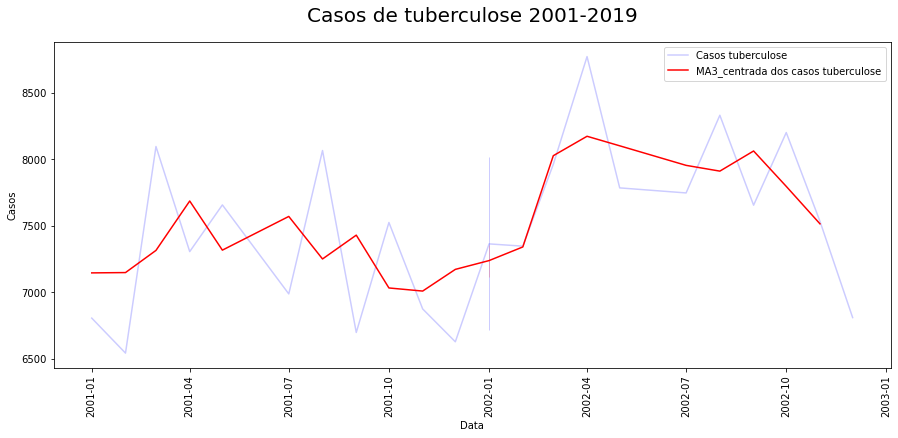

In [28]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Data', y='Casos', data=casos_tuberculose_ano_mes[1:24], color='blue',alpha=0.2,label='Casos tuberculose')
sns.lineplot(x='Data', y='MA3_Centrada', data=casos_tuberculose_ano_mes[:23], color='red',label='MA3_centrada dos casos tuberculose')
plt.xticks(rotation=90)
plt.title('Casos de tuberculose 2001-2019', fontsize=20, pad=20)
plt.show()

Outro ponto é que importante salientar é que o número $n$, a quantidade de elementos utilizados para calcular a média móvel pode depender do problema e envolver algum critério relacionado as regras do problema que esta sendo analisado. 

> **Por exemplo:** Em analise gráfica de mercado financeiro existem dois indicadores muito utilizados, MME21 e MME200 que são *médias móveis exponenciais* (conhecidas como $EMA$) com janela de 21 elementos e 200 elementos...

A aplicação da média móvel exponencial, MME ou EMA (Exponential Moving Average), sobre uma sequência $(pi)_{i=1}^{m}$ resulta na sequência das médias ponderadas por potências de $\alpha$ das subsequências de $n$ elementos da sequência, tal que $n<m$, e $n,m \in N$. Desta maneira, dado uma sequência de m elementos $P=(p_1,…,p_{m})$, o cálculo de um termo qualquer da sequência resultante pela média móvel exponencial é dado por:

$$\begin{align}
 \overline{\rm p}_i & = \alpha p_{i+1}  + \alpha(1-\alpha)p_{i+2}  + \cdots +  \alpha(1-\alpha)^{i+n-1}p_{i+n-1} + (1-\alpha)^{i+n}p_{i+n} \\
   & = { \alpha \sum_{j=1}^{n-1} {p_{i+j}(1-\alpha)^{j-1}}}  + (1-\alpha)^{i+n}p_{i+n}\\
  \text{tal que } \alpha & = \frac{2}{s+1} ~, ~s \in\mathbb N^*.
\end{align}$$

As mesmas regras de expansão se repetem para a média móvel exponencial. A diferença da média exponencial para a média móvel comum é que a exponencial coloca um peso maior nos dados mais recentes, enquanto os dados mais antigos ficam com pesos cada vez menores; na média móvel comum todos os dados possuem o mesmo peso. A média móvel exponencial é uma versão especialista da média móvel ponderada, note que na exponencial todos os seus pesos são potências, o que implica em uma relação não-linear entre os dados, estão no intervalo entre $0$ e $1, ∀j(wj∈[0,1])$ e que o somatório dos seus pesos é necessariamente igual a um, 
$\sum_{j=1}^{n}w_{j}=1$.

No pandas podemos utilizar o método `.ewm()` de uma séries ou dataframe. Este método providência uma janela preparada para cálculo de médias ponderadas exponencialmente.

**DataFrame.ewm**(com=None, span=None, halflife=None, alpha=None, min_periods=0, adjust=True, ignore_na=False, axis=0, times=None)[source](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html#pandas.DataFrame.ewm)

> Provide exponential weighted (EW) functions.

> Available EW functions: `mean()`, `var()`, `std()`, `corr()`, `cov()`.

> Exactly one parameter: `com`, `span`, `halflife`, or `alpha` must be provided.

In [29]:
casos_tuberculose_ano_mes['MME3'] = casos_tuberculose_ano_mes['Casos'].ewm(3).mean()

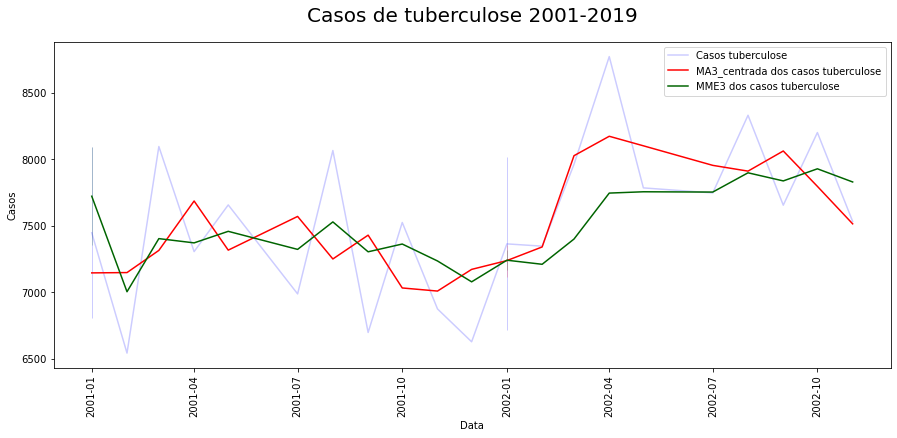

In [30]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Data', y='Casos', data=casos_tuberculose_ano_mes[:23], color='blue',alpha=0.2,label='Casos tuberculose')
sns.lineplot(x='Data', y='MA3_Centrada', data=casos_tuberculose_ano_mes[:23], color='red',label='MA3_centrada dos casos tuberculose')
sns.lineplot(x='Data', y='MME3', data=casos_tuberculose_ano_mes[:23], color='darkgreen',label='MME3 dos casos tuberculose')
plt.xticks(rotation=90)
plt.title('Casos de tuberculose 2001-2019', fontsize=20, pad=20)
plt.show()

> Note que aparentemente a média móvel exponencial se ajusta muito melhor **variação repentinana tendência dos dados**. Note que se queremos analisar uma tendência mensal a média móvel exponencial pode ser uma boa estimativa. Isso acontece porque ela tem coeficientes que ponderam os elementos e que seguem uma série esponencial assim se um termo novo tem um crescimento abrupto o coeficiente irá dar um peso maior a esta variação...

## Previsão Breve

> Dado que temos as médias móveis, qual o valor mais provável para o próximo mês? A MA ou a MME? 

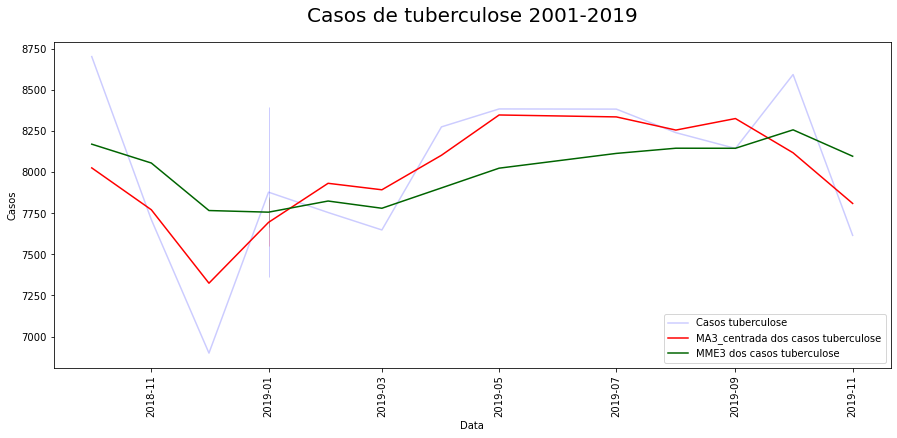

In [31]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Data', y='Casos', data=casos_tuberculose_ano_mes[-15:-1], color='blue',alpha=0.2,label='Casos tuberculose')
sns.lineplot(x='Data', y='MA3_Centrada', data=casos_tuberculose_ano_mes[-15:-1], color='red',label='MA3_centrada dos casos tuberculose')
sns.lineplot(x='Data', y='MME3', data=casos_tuberculose_ano_mes[-15:-1], color='darkgreen',label='MME3 dos casos tuberculose')
plt.xticks(rotation=90)
plt.title('Casos de tuberculose 2001-2019', fontsize=20, pad=20)
plt.show()

In [32]:
casos_tuberculose_ano_mes

,Data,Casos,MA3,MA3_Centrada,MME3
0,2001-01-01,8088,NaN,NaN,8088.000000
1,2001-01-01,6805,NaN,7145.000000,7354.857143
2,2001-02-01,6542,7145.000000,7147.333333,7003.351351
3,2001-03-01,8095,7147.333333,7314.000000,7402.582857
4,2001-04-01,7305,7314.000000,7685.333333,7370.596671
...,...,...,...,...,...
223,2019-08-01,8239,8334.666667,8254.666667,8144.445454
224,2019-09-01,8143,8254.666667,8324.666667,8144.084090
225,2019-10-01,8592,8324.666667,8116.666667,8256.063068
226,2019-11-01,7615,8116.666667,7809.000000,8095.797301


In [33]:
valor_esperado_MA3 = casos_tuberculose_ano_mes['MA3'][-3:].mean()
valor_esperado_MME3 = casos_tuberculose_ano_mes['MME3'][-3:].mean()
valor_esperado_Media_total = casos_tuberculose_ano_mes['Casos'].mean()

desvio_MA3 = casos_tuberculose_ano_mes['MA3'][-3:].std()
desvio_MME3 = casos_tuberculose_ano_mes['MME3'][-3:].std()
desvio_total = casos_tuberculose_ano_mes['Casos'].std()

print(f'Valor esperado MA3: {int(valor_esperado_MA3)}+/-{int(desvio_MA3)}\nValor esperado MME3: {int(valor_esperado_MME3)}+/-{int(desvio_MME3)}')
print(f'Valor esperado media total: {int(valor_esperado_Media_total)}+/-{int(desvio_total)}')

Valor esperado MA3: 8083+/-259
Valor esperado MME3: 8076+/-190
Valor esperado media total: 7389+/-568


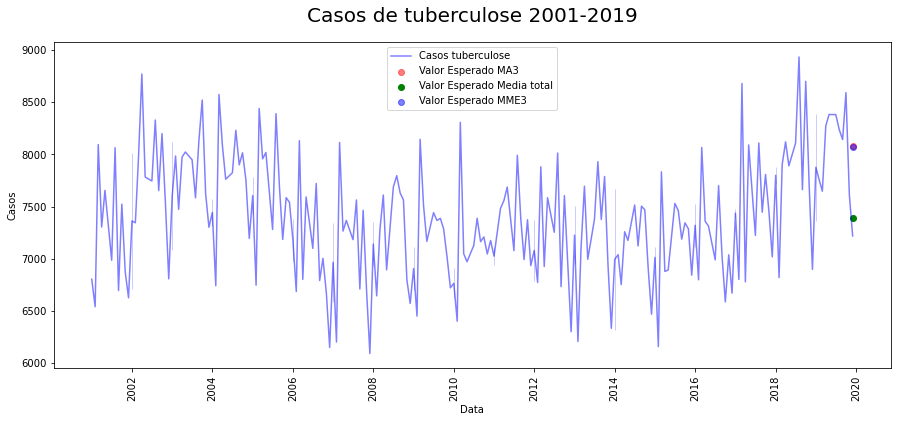

In [34]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Data', y='Casos', data=casos_tuberculose_ano_mes[1:], color='blue',alpha=0.5,label='Casos tuberculose')
plt.scatter(x=casos_tuberculose_ano_mes['Data'].iloc[-1], y=valor_esperado_MA3, color='red', label='Valor Esperado MA3', alpha=0.5)
plt.scatter(x=casos_tuberculose_ano_mes['Data'].iloc[-1], y=valor_esperado_Media_total, color='green', label='Valor Esperado Media total')
plt.scatter(x=casos_tuberculose_ano_mes['Data'].iloc[-1], y=valor_esperado_MME3, color='blue', label='Valor Esperado MME3',alpha=0.5)
plt.xticks(rotation=90)
plt.title('Casos de tuberculose 2001-2019', fontsize=20, pad=20)
plt.legend()
plt.show()

# Decomposição e Auto correlação



In [35]:
casos_tuberculose_ano_mes['Ano'] = casos_tuberculose_ano_mes['Data'].dt.year
casos_tuberculose_ano_mes['Mes'] = casos_tuberculose_ano_mes['Data'].dt.month
casos_tuberculose_ano_mes = casos_tuberculose_ano_mes[['Data','Casos','Ano','Mes']]
casos_tuberculose_ano_mes

,Data,Casos,Ano,Mes
0,2001-01-01,8088,2001,1
1,2001-01-01,6805,2001,1
2,2001-02-01,6542,2001,2
3,2001-03-01,8095,2001,3
4,2001-04-01,7305,2001,4
...,...,...,...,...
223,2019-08-01,8239,2019,8
224,2019-09-01,8143,2019,9
225,2019-10-01,8592,2019,10
226,2019-11-01,7615,2019,11


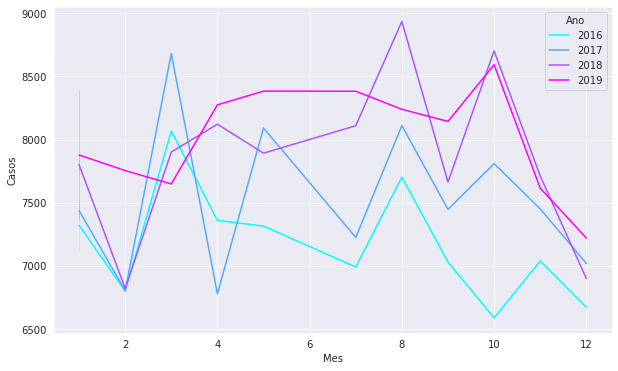

In [36]:
with sns.axes_style("darkgrid"):
    
    plt.figure(figsize=(10,6))
    ax = sns.lineplot(x='Mes', y='Casos',hue='Ano', data=casos_tuberculose_ano_mes.query('Ano in [2019,2018,2017,2016]'), palette='cool')
    ax;

Note que identificar padrões não é tão conclusivo. Quando queremos encontrar estes padrões de tendência em séries existe o módulo `stats models`, dentro dele existe uma classe chamda $TSA$ (Time Séries Analysis) que é focada para análise de séries temporais.

> **Time Series analysis tsa**: contains model classes and functions that are useful for time series analysis. Basic models include univariate autoregressive models (AR), vector autoregressive models (VAR) and univariate autoregressive moving average models (ARMA). Non-linear models include Markov switching dynamic regression and autoregression. It also includes descriptive statistics for time series, for example autocorrelation, partial autocorrelation function and periodogram, as well as the corresponding theoretical properties of ARMA or related processes. It also includes methods to work with autoregressive and moving average lag-polynomials. Additionally, related statistical tests and some useful helper functions are available.

fonte: https://www.statsmodels.org/devel/tsa.html

Deste módulo vamos utilizar a função `seasonal_decompose`, que fornece uma decomposição da série temporal afim de encontrar um padrão sasonal no conjunto de dados.

```python
statsmodels.tsa.seasonal.seasonal_decompose(x, model='additive', filt=None, period=None, two_sided=True, extrapolate_trend=0)
```

fonte: https://www.statsmodels.org/devel/generated/statsmodels.tsa.seasonal.seasonal_decompose.html?highlight=decompose#statsmodels.tsa.seasonal.seasonal_decompose

In [37]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [38]:
serie_decomposta = seasonal_decompose(casos_tuberculose_ano_mes[['Data','Casos']].set_index('Data'), period=3)

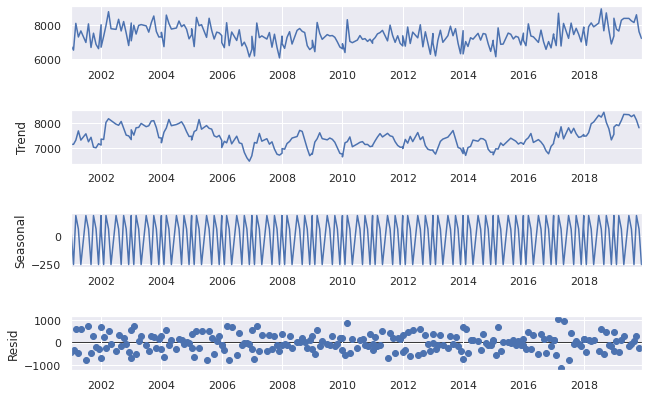

In [39]:
sns.set_theme()
ax = serie_decomposta.plot(observed=True)
ax.set_size_inches(10,6)

Aqui temos 4 gráficos. A decomposição de uma série temporal é de grosso modo usar uma combinação linear dos três ultimos gráficos para explicar as observações que estão no primeiro. Ou seja:

> **"A composição da tendência e da sasonalidade deveria resultar nas observações, entretanto não resulta exatamente nela, logo a composição da tendência, sasonalidade e um resíduo resulta nas observações"**

Note que os resíduos estão bem dispersos, no intervalo $[-1000, 1000]$, isso é bem relevante porque ilustra que o modelo aditivo (soma dos elementos que compõem uma série temporal) não consegue explicar as observações.

Podemos mudar o modelo de uma decomposição no `statsmodels.seasonal_decompose` através do hiperparâmetro `model`:

> **model** : {"additive", "multiplicative"}, optional
    Type of seasonal component. Abbreviations are accepted.
    
**Notes**

> 1. This is a naive decomposition. More sophisticated methods should be preferred.

> 2. The additive model is $Y[t] = T[t] + S[t] + e[t]$

> 3. The multiplicative model is $Y[t] = T[t] * S[t] * e[t]$

> 4. The results are obtained by first estimating the trend by applying a convolution filter to the data. The trend is then removed from the series and the average of this de-trended series for each period is the returned seasonal component.

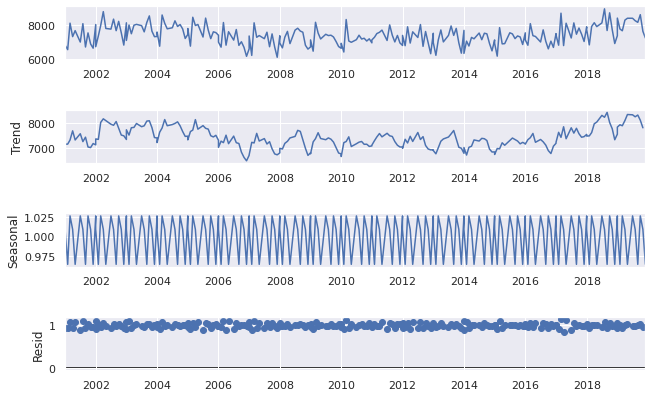

In [40]:
serie_decomposta = seasonal_decompose(casos_tuberculose_ano_mes[['Data','Casos']].set_index('Data'),
                                      period=3, model='multiplicative')

sns.set_theme()
ax = serie_decomposta.plot(observed=True)
ax.set_size_inches(10,6)

Desta forma a composição das observações depende multiplicativamente dos elementos que compõem uma série temporal. Note que agora o resíduo esta entre $[0,1]$, ou seja, bem diferente da ordem de grandeza dos milhares que se obtém através do modelo aditivo.

Uma série temporal ter uma característica multiplicativa permite tirar varias conclusões a respeito desses dados, porque isso reduz o caminho na hora de propor modelo preditivos.

### Base de dados de Passageiros 

Podemos notar que apesar dos casos de tuberculose ser possivelmente explicados por algum modelo multiplicativo, os resíduos dificultam este trabalho. Para exemplificar como uma série temporal pode ser explicada por algum modelo preditivo vou utilizar esta base de dados do número de passageiros de uma companhia aerea para ilustrar o que é uma série temporal bem comportada:

In [41]:
url_passageiros = 'https://raw.githubusercontent.com/alura-cursos/serie_temporal_bootcamp/main/AirPassengers.csv'

In [42]:
numero_passageiros = pd.read_csv(url_passageiros)
numero_passageiros.columns = ['Ano_Mes','Passageiros']

In [43]:
display(numero_passageiros.head())
display(numero_passageiros.info())

,Ano_Mes,Passageiros
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Ano_Mes      144 non-null    object
 1   Passageiros  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


None

In [44]:
numero_passageiros['Ano_Mes'] = pd.to_datetime(numero_passageiros['Ano_Mes'])
display(numero_passageiros.head())
display(numero_passageiros.info());

,Ano_Mes,Passageiros
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Ano_Mes      144 non-null    datetime64[ns]
 1   Passageiros  144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


None

Agora com as datas ajustadas e o número de passageiros sendo um número inteiro vamos fazer a decomposição da sasonalidade 

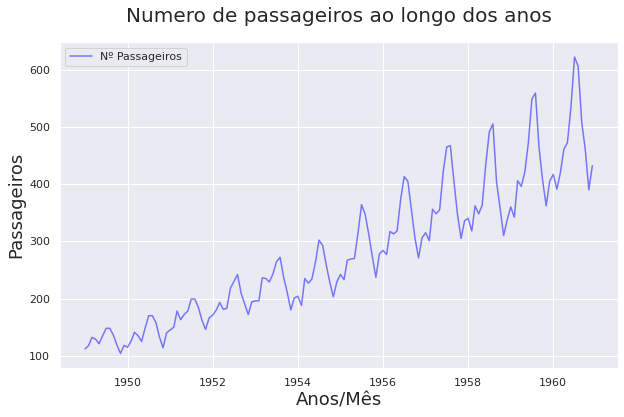

In [45]:
plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Ano_Mes', y='Passageiros', data=numero_passageiros, color='blue',alpha=0.5,label='Nº Passageiros')
ax.set_title('Numero de passageiros ao longo dos anos', pad=20, fontsize=20)
ax.set_ylabel('Passageiros', fontsize=18)
ax.set_xlabel('Anos/Mês', fontsize=18)
ax;

> Note que a tendência e a sasonalidade nesta série temporal do número de passageiros ao longo dos anos de uma companhia aerea é bem nítida. Vamos utilizar o `seasonal_decompose`:

#### Aditive 

In [46]:
numero_passageiros_decomposto = seasonal_decompose(x=numero_passageiros.set_index('Ano_Mes'),period=12)

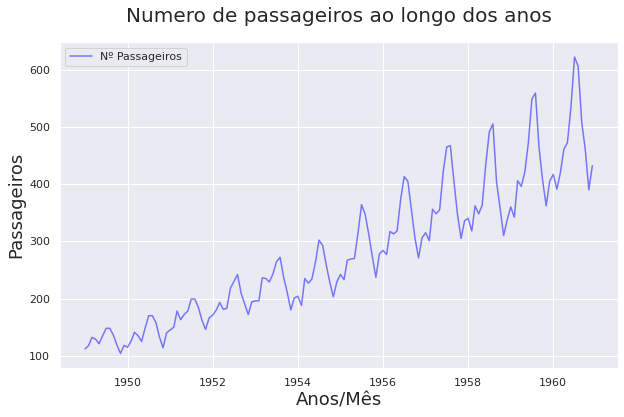

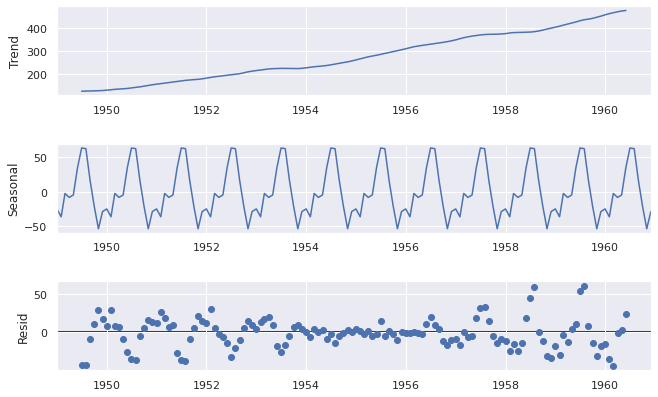

In [47]:
sns.set_theme()
ax = sns.lineplot(x='Ano_Mes', y='Passageiros', data=numero_passageiros,
                  color='blue',alpha=0.5,label='Nº Passageiros')
ax.set_title('Numero de passageiros ao longo dos anos', pad=20, fontsize=20)
ax.set_ylabel('Passageiros', fontsize=18)
ax.set_xlabel('Anos/Mês', fontsize=18)
ax.figure.set_size_inches(10,6)
ax = numero_passageiros_decomposto.plot(observed=False)
ax.set_size_inches(10,6)

#### multiplicative:


In [48]:
numero_passageiros_decomposto = seasonal_decompose(x=numero_passageiros.set_index('Ano_Mes'),period=12, model='multiplicative')

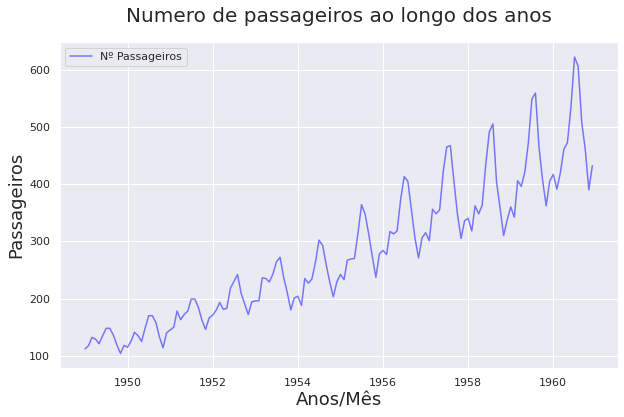

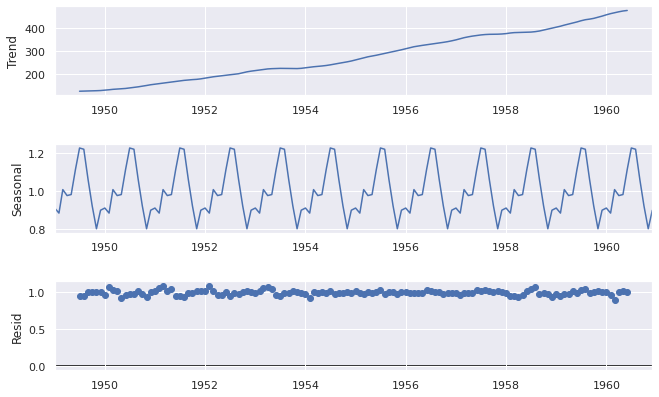

In [49]:
sns.set_theme()
ax = sns.lineplot(x='Ano_Mes', y='Passageiros', data=numero_passageiros,
                  color='blue',alpha=0.5,label='Nº Passageiros')
ax.set_title('Numero de passageiros ao longo dos anos', pad=20, fontsize=20)
ax.set_ylabel('Passageiros', fontsize=18)
ax.set_xlabel('Anos/Mês', fontsize=18)
ax.figure.set_size_inches(10,6)
ax = numero_passageiros_decomposto.plot(observed=False)
ax.set_size_inches(10,6)

> Note que o resíduo do modelo multiplicativo é mais bem comportado que o modelo aditivo. Note que o resíduo do modelo aditivo aumenta com o passar dos anos, isso acontece porque a amplitude do número de passageiros vai aumentando com o tempo também. 

# Autocorrelação e Autocorrelação parcial

É extremamente comum utilizar o coeficiente de correlação para se ter algum tipo de noção sobre a interdependência de variáveis. Lembrando que coeficiente de covariância ou correlação não indica necessariamente uma causalidade, por isso é importante uma teoria precedente que motive o uso dos coeficientes.

O coeficiente de autocorrelação é uma forma de comparar a correlação entre os elementos da série temporal com um subconjunto da propria série, digamos que temos uma série temporal expressa num vetor $\vec{V}$, a autocorrelação será calculada através de um vetor $\vec{x}_i$ que esta contido em uma janela de $\vec{V}$. É similar ao conceito da média móvel, mas em vez de calcular a média é extraida a correlação entre a janela e o dados da série.

Dentro do statsmodels existe uma rotina de funções uteis que já extraem a autocorrelação de uma série temporal:

```python
statsmodels.graphics.tsaplots.plot_acf(x, ax=None, lags=None, *, alpha=0.05, use_vlines=True, adjusted=False, fft=False, missing='none', title='Autocorrelation', zero=True, auto_ylims=False, bartlett_confint=True, vlines_kwargs=None, **kwargs)
```
> Plot the autocorrelation function

> Plots lags on the horizontal and the correlations on vertical axis.

fonte: https://www.statsmodels.org/dev/generated/statsmodels.graphics.tsaplots.plot_acf.html

In [50]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

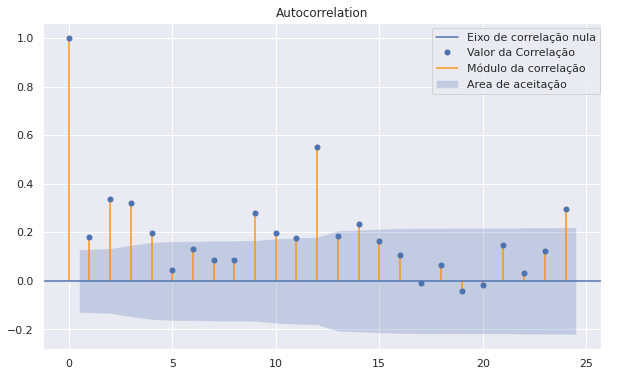

In [51]:
ax = plot_acf(casos_tuberculose_ano_mes['Casos'],vlines_kwargs={'color':'darkorange', 'alpha':0.9});
ax.set_size_inches(10,6)
ax.legend(['Eixo de correlação nula','Valor da Correlação','Módulo da correlação','Area de aceitação'], loc=(0.69,0.75))
ax;

> Acima temos o gráfico de autocorrelação. No eixo das ordenadas temos o valor da autocorrelação e no eixo das abscissas o tamanho da janela. A autocorrelação assim como o coeficiente de correlação pertence ao intervalo de $[-1,1]$, sendo acima de $|0.5|$ uma corelação forte. 

> No gráfico da autocorrelação temos o valor da correlação em si e também a área de aceitação. Além disso também temos a janela. Os pontos de correlação acima da área de aceitação podem se dizer que tem uma correlação forte e os pontos pertencentes podem ser interpretados como variações aleatórias.

> Assim, baseado no gráfico acima é possível afirmar que na janela cujo a diferença de tamanho é zero, a correlação é total, isso porque comprar a correlação de uma variável com ela mesma o valor por definição é $1$. Já quando a diferença entre os vetores $\vec{V}$ e $\vec{x}$ é de $1$ elemento, o valor do coeficiente de correlação $0.2$ que pode ser verificado na segunda linha vertical. Quando a diferença é de $2$ e $3$ elementos a correlação é acima de $0.2$... E assim é feita a análise. **O ideal é que sejam selecionadas as janelas cujo valor seja maior que a área de aceitação.**

In [52]:
casos_covid19_cidade_rj = pd.read_csv('covid19_rio_de_janeiro.csv')

In [53]:
casos_covid19_cidade_rj.sample(5)

,date,state,city,place_type,confirmed,deaths,is_last,estimated_population,city_ibge_code,confirmed_per_100k_inhabitants,death_rate
240,2020-06-06,RJ,Rio de Janeiro,city,35703,4401,False,6747815,3304557,529.10461,0.1233
13,2021-01-23,RJ,Rio de Janeiro,city,184293,16685,False,6747815,3304557,2731.15075,0.0905
318,2020-03-19,RJ,Rio de Janeiro,city,56,0,False,6747815,3304557,0.82990,0.0000
287,2020-04-20,RJ,Rio de Janeiro,city,3243,257,False,6747815,3304557,48.06000,0.0792
254,2020-05-23,RJ,Rio de Janeiro,city,21043,2702,False,6747815,3304557,311.84909,0.1284


In [54]:
casos_covid19_cidade_rj.columns

Index(['date', 'state', 'city', 'place_type', 'confirmed', 'deaths', 'is_last',
       'estimated_population', 'city_ibge_code',
       'confirmed_per_100k_inhabitants', 'death_rate'],
      dtype='object')

In [55]:
casos_covid19_cidade_rj = casos_covid19_cidade_rj[['date','confirmed','deaths','confirmed_per_100k_inhabitants']]

In [56]:
casos_covid19_cidade_rj['date'] = pd.to_datetime(casos_covid19_cidade_rj['date'])


In [57]:
casos_covid19_cidade_rj = casos_covid19_cidade_rj.sort_values(by='date')

In [58]:
casos_covid19_cidade_rj.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 325 entries, 324 to 0
Data columns (total 4 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   date                            325 non-null    datetime64[ns]
 1   confirmed                       325 non-null    int64         
 2   deaths                          325 non-null    int64         
 3   confirmed_per_100k_inhabitants  325 non-null    float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 12.7 KB


### Autocorrelação no número de casos por covid no RJ 

In [59]:
covid19_rj_decompose = seasonal_decompose(casos_covid19_cidade_rj[['date','confirmed_per_100k_inhabitants']].set_index('date'),
                                         period=4,model='multiplicative',)

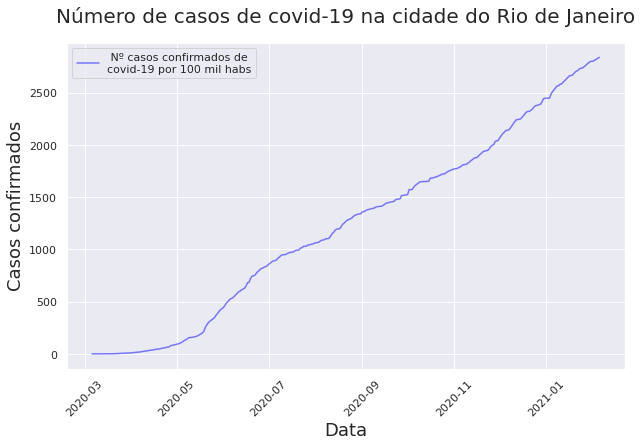

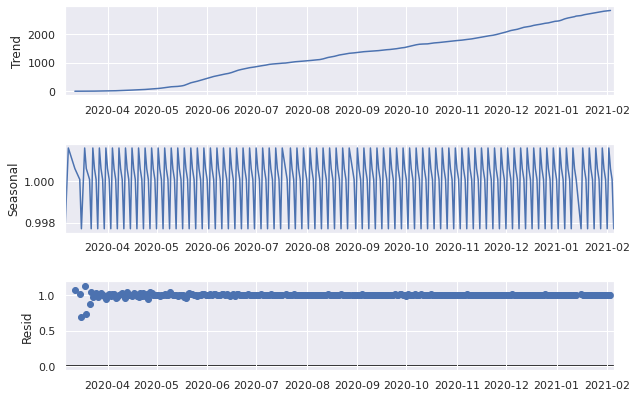

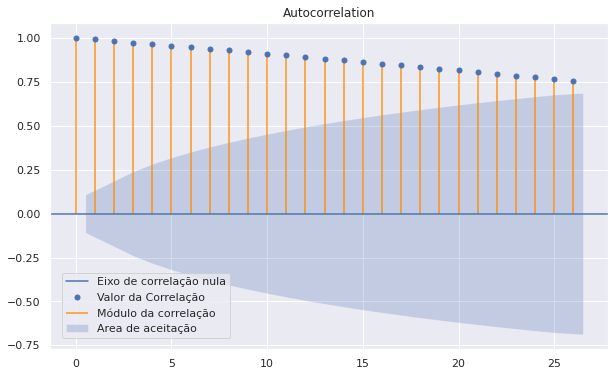

In [60]:
sns.set_theme()
ax = sns.lineplot(x='date', y='confirmed_per_100k_inhabitants', data=casos_covid19_cidade_rj,
                  color='blue',alpha=0.5,label=' Nº casos confirmados de\ncovid-19 por 100 mil habs')
ax.set_title('Número de casos de covid-19 na cidade do Rio de Janeiro', pad=20, fontsize=20)
ax.set_ylabel('Casos confirmados', fontsize=18)
ax.set_xlabel('Data', fontsize=18)
plt.xticks(rotation=45)

ax.figure.set_size_inches(10,6)
ax = covid19_rj_decompose.plot(observed=False)
ax.set_size_inches(10,6)

ax = plot_acf(casos_covid19_cidade_rj['confirmed_per_100k_inhabitants'],vlines_kwargs={'color':'darkorange', 'alpha':0.9});
ax.set_size_inches(10,6)
ax.legend(['Eixo de correlação nula','Valor da Correlação','Módulo da correlação','Area de aceitação'], loc=(0.1,0.1))
ax;

### Autocorrelação das mortes por covid

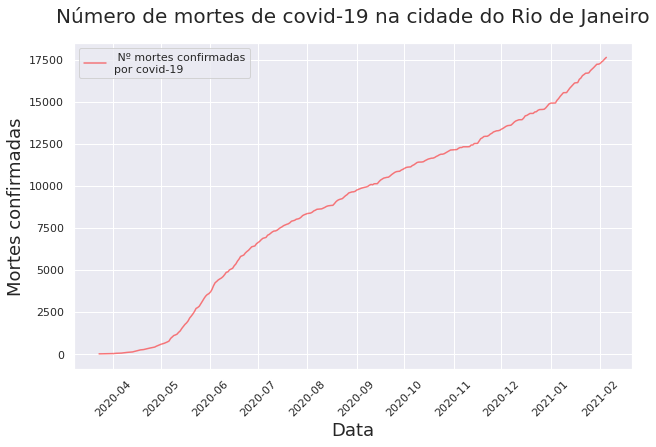

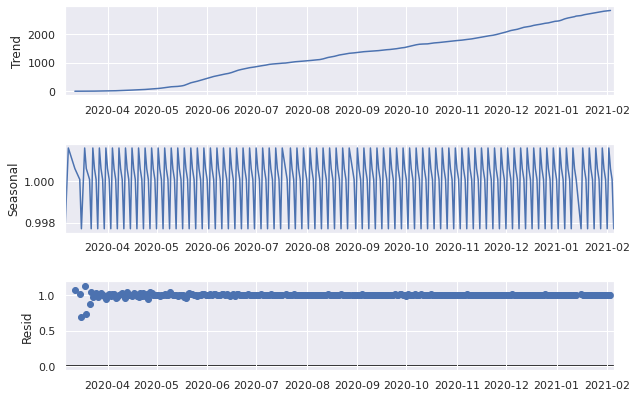

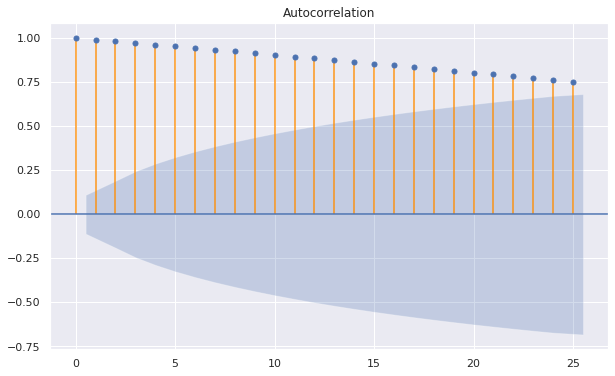

In [61]:
covid19_rj_deaths = casos_covid19_cidade_rj.query('deaths != 0')
covid19_rj_decompose_deaths = seasonal_decompose(covid19_rj_deaths[['date','deaths']].set_index('date'),
                                         period=4,model='multiplicative',)

sns.set_theme()
ax = sns.lineplot(x='date', y='deaths', data=covid19_rj_deaths,
                  color='red',alpha=0.5,label=' Nº mortes confirmadas\npor covid-19')
ax.set_title('Número de mortes de covid-19 na cidade do Rio de Janeiro', pad=20, fontsize=20)
ax.set_ylabel('Mortes confirmadas', fontsize=18)
ax.set_xlabel('Data', fontsize=18)
plt.xticks(rotation=45)

ax.figure.set_size_inches(10,6)
ax = covid19_rj_decompose.plot(observed=False)
ax.set_size_inches(10,6)

ax = plot_acf(covid19_rj_deaths['deaths'],vlines_kwargs={'color':'darkorange', 'alpha':0.9});
ax.set_size_inches(10,6)
#ax.legend(['Eixo de correlação nula','Valor da Correlação','Módulo da correlação','Area de aceitação'])
ax;

Podemos concluir que a autocorrelação tanto do número de casos de covid quanto o número de mortes por covid na cidade do rio de janeiro tem um coeficiente autíssimo, tanto para as janelas de 5 dias, quanto para as janelas de 25 dias... 

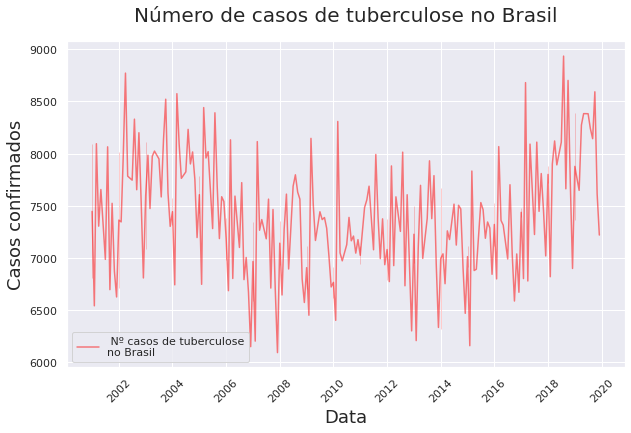

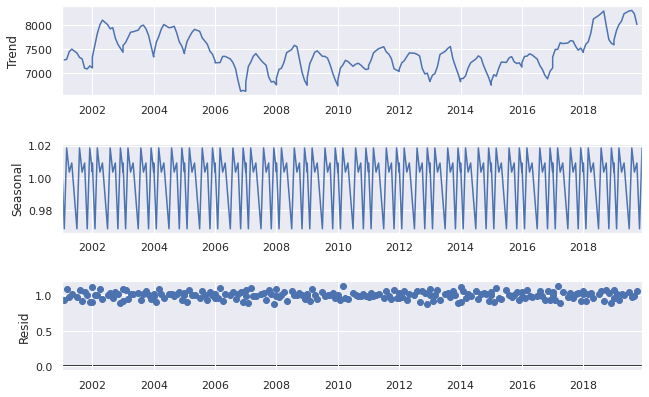

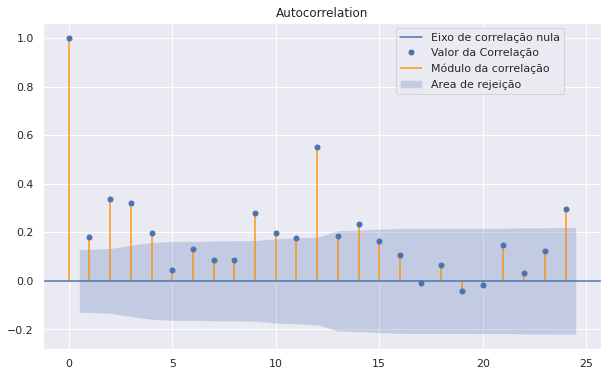

In [62]:
ax = sns.lineplot(x='Data', y='Casos', data=casos_tuberculose_ano_mes,
                  color='red',alpha=0.5,label=' Nº casos de tuberculose\nno Brasil')
ax.set_title('Número de casos de tuberculose no Brasil', pad=20, fontsize=20)
ax.set_ylabel('Casos confirmados', fontsize=18)
ax.set_xlabel('Data', fontsize=18)
plt.xticks(rotation=45)
ax.figure.set_size_inches(10,6)

casos_tuberculose_ano_mes_decompose = seasonal_decompose(
    casos_tuberculose_ano_mes[['Data','Casos']].set_index('Data'),
    model='multiplicative', period=4)

ax = casos_tuberculose_ano_mes_decompose.plot(observed=False)
ax.set_size_inches(10,6)

ax = plot_acf(casos_tuberculose_ano_mes['Casos'],vlines_kwargs={'color':'darkorange', 'alpha':0.9});
ax.set_size_inches(10,6)
ax.legend(['Eixo de correlação nula',
           'Valor da Correlação',
           'Módulo da correlação',
           'Area de rejeição'],
            loc=(0.65,0.75))
ax;

Note que a comparação entre os dados relacionados a tuberculose e a covid tem resultados bem diferentes perante a análise de tendência, sasonalidade e residuos. Note que a janela do coeficiente de autocorrelação é de até uma defasagem de $25$ elementos. **Em muitos casos é necessário aplicar um teste Durbin-Watson para analisar a significância do coeficiente de correlação.**

> O teste de Durbin-Watson é utilizado para detectar a presença de autocorrelação (dependência) nos resíduos de uma análise regressiva. O teste é baseado na suposição de que os errosa do modelo são gerados por um processo autoregressivo de primeira ordem, tal que:

$$\epsilon_i = \rho \epsilon_{i - 1} + a_i,$$

> em que $\epsilon_i$ é o erro da $i$-ésima observação e $a_i \sim N(0,\sigma_{a}^2)$. A hipótese a ser testada é:

$$H_0 : \rho = 0 $$

$$H_1 : \rho \ne 0 $$

O `statsmodels` tem uma função que calcula o teste:

```python
statsmodels.stats.stattools.durbin_watson(resids, axis=0)
```
> Calculates the Durbin-Watson statistic.

fonte: https://www.statsmodels.org/dev/generated/statsmodels.stats.stattools.durbin_watson.html

In [63]:
from statsmodels.stats.stattools import durbin_watson

In [64]:
durbin_watson(casos_tuberculose_ano_mes_decompose.resid.dropna())

0.009255346478122914

> Quanto mais próxima de 0 a estatística, maior será a evidência de correlação serial positiva. Quanto mais próximo de 4, mais evidências de correlação serial negativa. 

Vale salientar que existem 4 condições para que o teste de Durbin Watson possa ser aplicado:

1. O processo gerador dos erros é um AR(1) do tipo $\epsilon_i = \rho \epsilon_{i - 1} + a_i,$ onde $|\rho| < 1$ e $a_i$ é um ruido branco.

2. Os coeficientes estimados do modelo a ser testado são consistentes.

3. O modelo de regressão contém intercepto.

4. A matriz $X$ de variáveis explicativas é composta de colunas não estocásticas, ou fixas em amostragem repetida.



## Auto Correlação parcial 

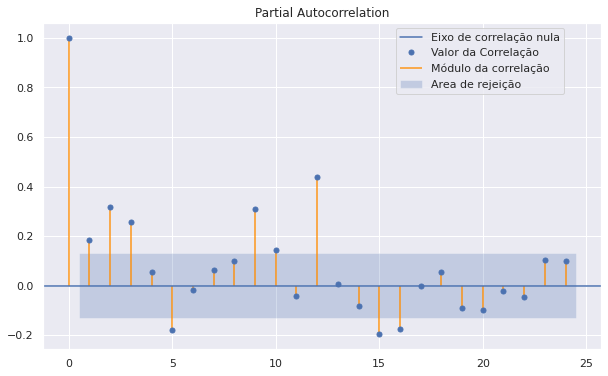

In [65]:
ax = plot_pacf(casos_tuberculose_ano_mes['Casos'],vlines_kwargs={'color':'darkorange', 'alpha':0.9});
ax.set_size_inches(10,6)
ax.legend(['Eixo de correlação nula',
           'Valor da Correlação',
           'Módulo da correlação',
           'Area de rejeição'],
            loc=(0.65,0.75))
ax;


> A vantagem da autocorrelação parcial é que ela é normalizada em relação ao número de elementos da janela. A utilidade de autocorrelação parcial é que ela é útil quando a correlação entre o elemento que esta numa defasagem de um elemento é bem alta, por exemplo no caso da covid:

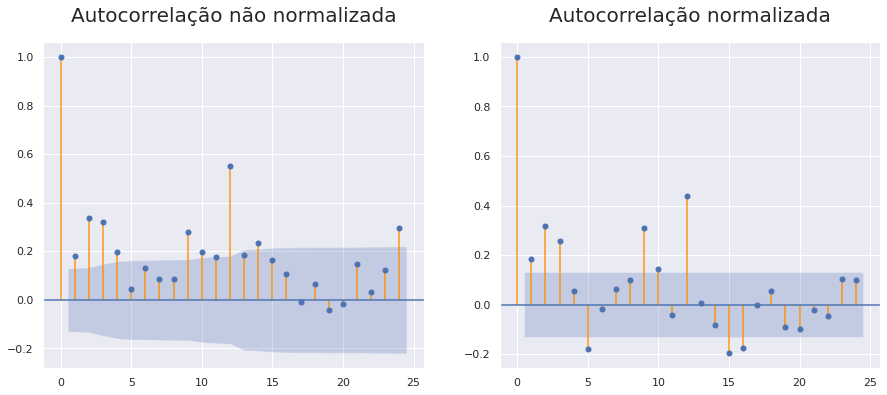

In [66]:
#sns.set_context('talk')
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))
plot_acf(casos_tuberculose_ano_mes['Casos'],vlines_kwargs={'color':'darkorange', 'alpha':0.9}, ax=ax1);
plot_pacf(casos_tuberculose_ano_mes['Casos'],vlines_kwargs={'color':'darkorange', 'alpha':0.9}, ax=ax2);
ax1.set_title('Autocorrelação não normalizada',fontsize=20, pad=20)
ax2.set_title('Autocorrelação normalizada',fontsize=20, pad=20)
ax;

A autocorrelação parcial é muito mais precisa por ser normalizada em relação aos legs (janelas), analisar a autocorrelação parcial permite não cair em afirmações equivocadas de que o mês passado influencia no mês anterior, no caso de modelos patologicos isso pode fazer sentido com respeito a transmissão. Mas no caso do número de passageiros numa companhia aerea isso não faz sentido.

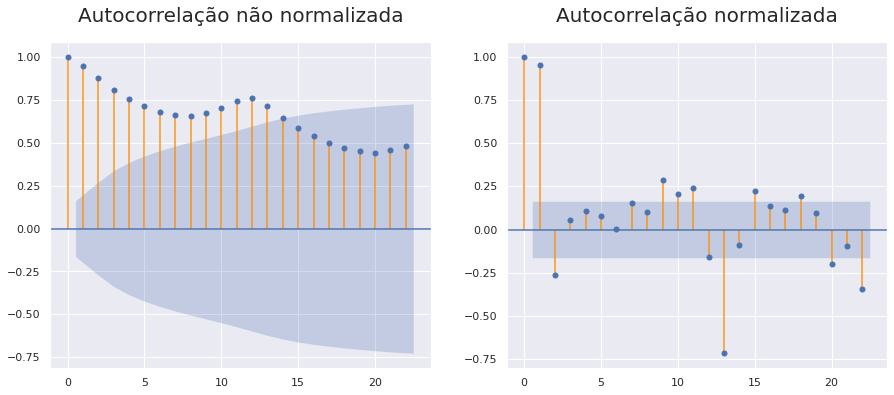

In [67]:
#sns.set_context('talk')
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6),)
plot_acf(numero_passageiros['Passageiros'],vlines_kwargs={'color':'darkorange', 'alpha':0.9}, ax=ax1);
plot_pacf(numero_passageiros['Passageiros'],vlines_kwargs={'color':'darkorange', 'alpha':0.9}, ax=ax2);
ax1.set_title('Autocorrelação não normalizada',fontsize=20, pad=20)
ax2.set_title('Autocorrelação normalizada',fontsize=20, pad=20)
ax;

Note que a autocorrelação normalizada trás muito mais informações do que a não normalizada.

# Reforçando conceitos

In [68]:
numero_passageiros['Mes'] = numero_passageiros['Ano_Mes'].dt.month
numero_passageiros['Ano'] = numero_passageiros['Ano_Mes'].dt.year
numero_passageiros

,Ano_Mes,Passageiros,Mes,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960


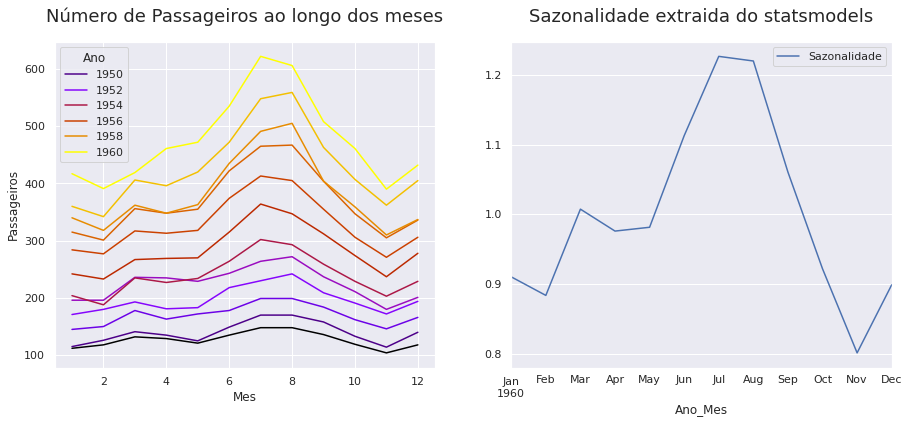

In [69]:
plt.subplot(1,2,1)
ax = sns.lineplot(x='Mes', y='Passageiros', data=numero_passageiros, hue='Ano', palette='gnuplot')
ax.set_title('Número de Passageiros ao longo dos meses', fontsize=18,pad=20)
plt.subplot(1,2,2)
ax2 = numero_passageiros_decomposto.seasonal[-12:].plot()
ax2.set_title('Sazonalidade extraida do statsmodels', fontsize=18,pad=20)
ax2.legend(['Sazonalidade'])
ax.figure.set_size_inches(15,6)

> Note que nos meses de junho até setembro se tem um acréssimo significativo no número de passageiros da companhia aerea. É sempre importante enteder o contexto dos dados, por exemplo, estes dados de passageiros é da parte norte do continente americano, ou seja, esses meses coincidêm com as férias dos trabalhadores/alunos.

> Lembrando que a sazonalidade oferece uma variação em comum a todos os meses, mas ela não é exatamente a mesma para todos os meses, pois ainda assim existe pequenas variações aleatórias em cada mês, tornando esse processo estocástico.

# Modelo $\text{ARIMA}(p,d,q)$

Uma metodologia bastante utilizada na análise de modelos paramétricos é conhecida como abordagem Box e Jenkins (1970). Tal metodologia consiste em ajustar modelos autoregressivos integrados com médias móveis, ou melhor, Auto Regressive Integrated Moves Averages ou $\text{ARIMA}(p,d,q)$. 

[**Os Modelos ARIMA e a abordagem de Box-Jenkins: Uma Aplicação na Previsão do IBOVESPA a Curtlssimo Prazo**](https://www.scielo.br/pdf/rae/v29n2/v29n2a06.pdf)

[**ARIMA-GARCH Model and ARIMA-GARCH Ensemble for Value-at-Risk Prediction on Stocks Portfolio**](https://www.preprints.org/manuscript/202010.0191/v1) 

Existe uma abordagem mais recentes que modificam o modelo deixando-o mais sofisticado 

```python
statsmodels.tsa.arima.model.ARIMA(endog, exog=None, order=(0, 0, 0), seasonal_order=(0, 0, 0, 0), trend=None, enforce_stationarity=True, enforce_invertibility=True, concentrate_scale=False, trend_offset=1, dates=None, freq=None, missing='none', validate_specification=True)[source]¶
```

> Autoregressive Integrated Moving Average (ARIMA) model, and extensions

> This model is the basic interface for ARIMA-type models, including those with exogenous regressors and those with seasonal components. The most general form of the model is SARIMAX(p, d, q)x(P, D, Q, s). It also allows all specialized cases, including

* autoregressive models: AR(p)

* moving average models: MA(q)

* mixed autoregressive moving average models: ARMA(p, q)

* integration models: ARIMA(p, d, q)

* seasonal models: SARIMA(P, D, Q, s)

* regression with errors that follow one of the above ARIMA-type models

`order`tuple, optional

> The (p,d,q) order of the model for the autoregressive, differences, and moving average components. d is always an integer, while p and q may either be integers or lists of integers.


In [70]:
from statsmodels.tsa.arima.model import ARIMA

In [71]:
modelo_ARIMA = ARIMA(casos_tuberculose_ano_mes['Casos'].values.astype('float32'), order=(0,0,0))
modelo_ARIMA_treinado = modelo_ARIMA.fit()

In [72]:
print(modelo_ARIMA_treinado.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  228
Model:                          ARIMA   Log Likelihood               -1769.205
Date:                Tue, 09 Feb 2021   AIC                           3542.410
Time:                        22:35:21   BIC                           3549.269
Sample:                             0   HQIC                          3545.177
                                - 228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7389.2857     37.891    195.012      0.000    7315.020    7463.552
sigma2       3.22e+05   3.39e+04      9.507      0.000    2.56e+05    3.88e+05
Ljung-Box (Q):                      292.11   Jarque-

> Acima temos um summario e varias estatisticas a respeito dos coeficientes do método ARIMA e também testes de hipóteses relacionado a cada um deles, por exemplo teste de Skew analisa a simetria dos reíduos, o teste de heteroscedasticidade.

## Previsão: `forecast()`

Ao treinar uma modelo usando o método `.fit()`o resultado é um objeto do tipo `ARIMAResults`. Este objeto tem um método chamado `.forecast()` responsável por fazer a iteração 

```python
from statsmodels.tsa.arima.model import ARIMA

model_ARIMA = ARIMA(x_treino).fit()

model_ARIMA.forecast(steps=1, **kwargs)
```
> Out-of-sample forecasts

In [73]:
casos_previstos = modelo_ARIMA_treinado.forecast(steps=13)
casos_previstos

array([7389.2856685, 7389.2856685, 7389.2856685, 7389.2856685,
       7389.2856685, 7389.2856685, 7389.2856685, 7389.2856685,
       7389.2856685, 7389.2856685, 7389.2856685, 7389.2856685,
       7389.2856685])

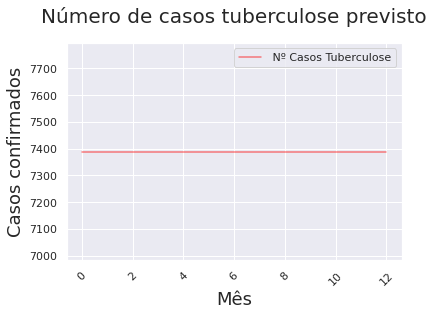

In [74]:
ax = sns.lineplot(x=list(range(len(casos_previstos))), y=casos_previstos,
                  color='red',alpha=0.5,label=' Nº Casos Tuberculose')
ax.set_title('Número de casos tuberculose previsto', pad=20, fontsize=20)
ax.set_ylabel('Casos confirmados', fontsize=18)
ax.set_xlabel('Mês', fontsize=18)
plt.xticks(rotation=45)
ax;

Note que o valor estimado pelo ARIMA(0,0,0) é literalmente a média total:

In [75]:
casos_tuberculose_ano_mes['Casos'].mean()

7389.285087719299

> Isso acontece porque para o parâmetro `order` passamos a ordem das funções de aproximação. As componentes (p,d,q) são a quantidade de elementos para o cálculo da autorregressão ($p$), a derifivada de ordem $d$ e a quantidade de elementos selecionados para o cálculo da média móvel $q$. **A derivada só é suportada até segunda ordem.**

Vamos usar um modelo $\text{ARIMA}(1,0,0)$, outro $\text{ARIMA}(0,1,0)$ e outro $\text{ARIMA}(0,0,1)$:

/home/conrado/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


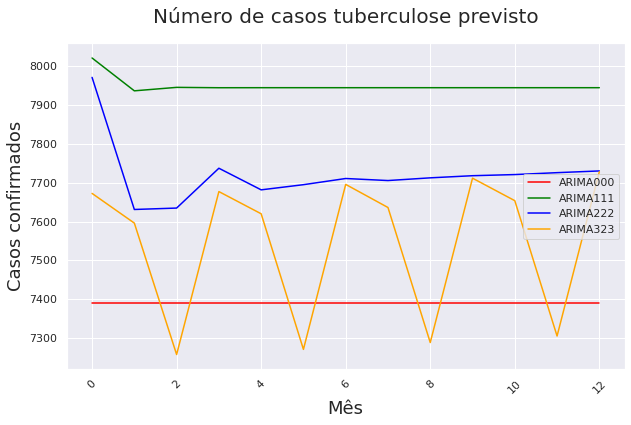

In [76]:
modelo_ARIMA_000 = ARIMA(casos_tuberculose_ano_mes['Casos'].values.astype('float32'), order=(0,0,0))
modelo_ARIMA_111 = ARIMA(casos_tuberculose_ano_mes['Casos'].values.astype('float32'), order=(1,1,1))
modelo_ARIMA_222 = ARIMA(casos_tuberculose_ano_mes['Casos'].values.astype('float32'), order=(2,2,2))
modelo_ARIMA_323 = ARIMA(casos_tuberculose_ano_mes['Casos'].values.astype('float32'), order=(3,2,3))

modelo_ARIMA000_treinado = modelo_ARIMA_000.fit()
modelo_ARIMA111_treinado = modelo_ARIMA_111.fit()
modelo_ARIMA222_treinado = modelo_ARIMA_222.fit()
modelo_ARIMA323_treinado = modelo_ARIMA_323.fit()

casos_previstos000 = modelo_ARIMA000_treinado.forecast(steps=13)
casos_previstos111 = modelo_ARIMA111_treinado.forecast(steps=13)
casos_previstos222 = modelo_ARIMA222_treinado.forecast(steps=13)
casos_previstos323 = modelo_ARIMA323_treinado.forecast(steps=13)

ax = sns.lineplot(x=list(range(len(casos_previstos))), y=casos_previstos000,color='red',label='ARIMA000')
ax = sns.lineplot(x=list(range(len(casos_previstos))), y=casos_previstos111,color='green',label='ARIMA111')
ax = sns.lineplot(x=list(range(len(casos_previstos))), y=casos_previstos222,color='blue',label='ARIMA222')
ax = sns.lineplot(x=list(range(len(casos_previstos))), y=casos_previstos323,color='orange',label='ARIMA323')

ax.figure.set_size_inches(10,6)
ax.set_title('Número de casos tuberculose previsto', pad=20, fontsize=20)
ax.set_ylabel('Casos confirmados', fontsize=18)
ax.set_xlabel('Mês', fontsize=18)
plt.xticks(rotation=45)
ax;

Note que cada modelo gera uma previsão diferente. Também é possível estimar qual o melhor polínômio para cada elemento que compõem a série temporal, por isso o método decompose é tão interessante:

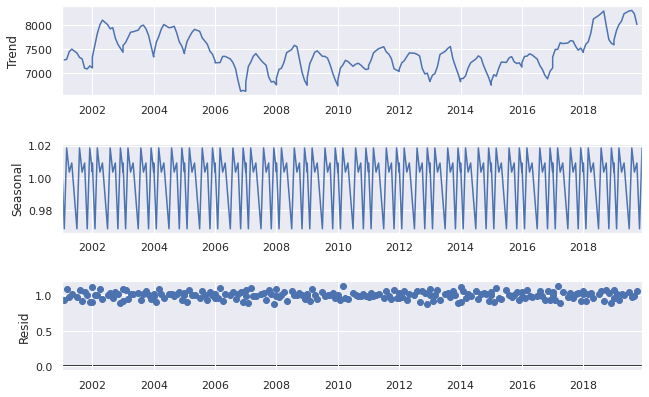

In [77]:
ax = casos_tuberculose_ano_mes_decompose.plot(observed=False);
ax.set_size_inches(10,6)

Além disso caso em vez de utilizar o módulo 
```python
from statsmodels.tsa.arima_model import ARIMA

model_ARIMA = ARIMA(x_treino).fit()

model_ARIMA.forecast(steps=1, **kwargs)
```

O forecast neste caso do módulo que seŕa descontinuado, vai retornar três matrizes: 

Returns

`forecast`: ndarray

> Array of out of sample forecasts
    
`stderr`: ndarray

> Array of the standard error of the forecasts.

`conf_int`: ndarray

> 2d array of the confidence interval for the forecast

vou colocar os dados em um DataFrame:

In [78]:
from statsmodels.tsa.arima_model import ARIMA

model_ARIMA = ARIMA(casos_tuberculose_ano_mes['Casos'].values.astype('float32'), order=(1,1,1)).fit()

forecast, desvio, intervalo_confianca = model_ARIMA.forecast(steps=13)

dados_arima_111 = pd.DataFrame({
    'forecast':forecast,
    'desvio_padrao': desvio,
    'minimo_conf_int': intervalo_confianca[:,0],
    'maximo_conf_int': intervalo_confianca[:,1]
})
display(dados_arima_111)


,forecast,desvio_padrao,minimo_conf_int,maximo_conf_int
0,8041.210944,520.835376,7020.392365,9062.029523
1,7956.183897,521.070153,6934.905164,8977.462629
2,7968.085590,525.707748,6937.717338,8998.453842
3,7969.620050,529.576455,6931.669271,9007.570828
4,7972.263360,533.491501,6926.639233,9017.887488
5,7974.788071,537.370092,6921.562045,9028.014097
6,7977.325467,541.221730,6916.550369,9038.100566
7,7979.861507,545.046061,6911.590857,9048.132157
8,7982.397691,548.843755,6906.683699,9058.111684
9,7984.933860,552.615350,6901.827678,9068.040043


Nas 4 colunas do dataframe temos os dados previstos, o desvio padrão e o intervalo de confiança do modelo.

## Problema das previsões

Fazer previsões é algo bem subjetivo, em geral previsões exatas em sistemas estocásticos é impossível por definição. Mas como estamos visando realizar uma previsão, o ideal seria separar os dataset em um conjunto de dados de treino e dados de teste. 

Os dados de treino serão utilizados para treinar e ajustar um modelo que fará previsões, já os dados de teste são resultados reais que serão comparados com os resultados previstos pelo modelo proposto a explicar o fenômeno. 

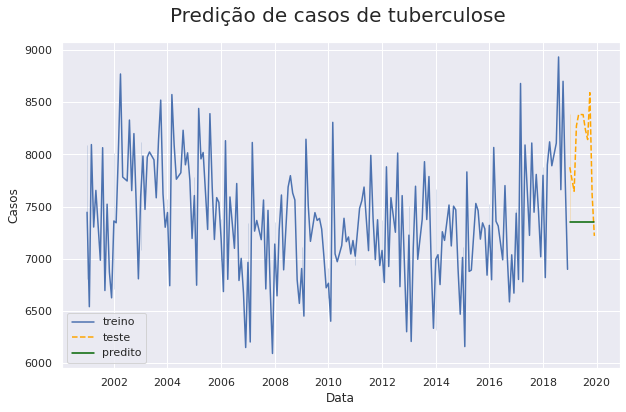

In [79]:
from statsmodels.tsa.arima_model import ARIMA

x_treino = casos_tuberculose_ano_mes.query('Ano != 2019')
y_teste = casos_tuberculose_ano_mes.query('Ano == 2019')

model_ARIMA111_treinado = ARIMA(x_treino['Casos'].values.astype('float32'), order=(0,0,0)).fit()

y_treino = model_ARIMA111_treinado.forecast(12)[0]

ax = sns.lineplot(x='Data', y='Casos', data=x_treino, label='treino')
ax = sns.lineplot(x='Data', y='Casos', data=y_teste,linestyle='dashed', color='orange', label='teste')
ax = sns.lineplot(x='Data', y=y_treino, data=y_teste, color='darkgreen', label='predito')

ax.set_title('Predição de casos de tuberculose ',fontsize=20, pad=20)
ax.figure.set_size_inches(10,6)
ax.legend()
ax;

Note que o modelo acima quando a ordem do $ARIMA(0,0,0)$ a melhor estimativa de ordem $0$ para o futuro é a média de todos os outros valores. Por isso é interessante modificar os parâmetros até o modelo tenha um ajuste melhor ao dados.

### O mesmo vale para os casos de COVID

In [80]:
casos_covid19_cidade_rj['mes'] = casos_covid19_cidade_rj['date'].dt.month
casos_covid19_cidade_rj.head()

,date,confirmed,deaths,confirmed_per_100k_inhabitants,mes
324,2020-03-06,1,0,0.01482,3
323,2020-03-08,2,0,0.02964,3
322,2020-03-12,13,0,0.19265,3
321,2020-03-15,22,0,0.32603,3
320,2020-03-16,23,0,0.34085,3


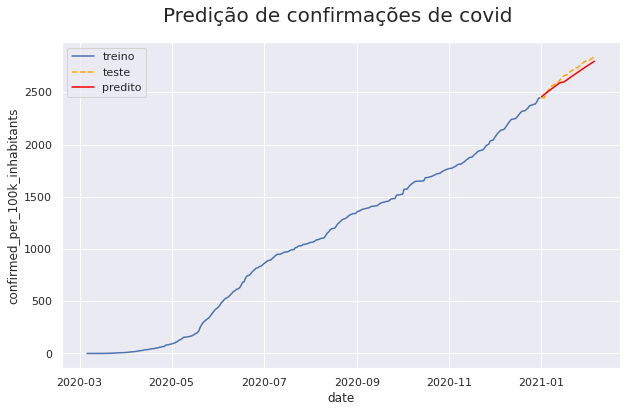

In [81]:
from statsmodels.tsa.arima_model import ARIMA

x_treino = casos_covid19_cidade_rj.query('mes not in [1,2]')
y_teste = casos_covid19_cidade_rj.query('mes == 1 or mes == 2')

model_ARIMA111_treinado = ARIMA(x_treino['confirmed_per_100k_inhabitants'].values.astype('float32'), order=(1,1,1)).fit()

y_treino = model_ARIMA111_treinado.forecast(len(y_teste))[0]

ax = sns.lineplot(x='date', y='confirmed_per_100k_inhabitants', data=x_treino, label='treino')
ax = sns.lineplot(x='date', y='confirmed_per_100k_inhabitants', data=y_teste, linestyle='dashed', color='orange', label='teste')
ax = sns.lineplot(x='date', y=y_treino, data=y_teste, color='red', label='predito')

ax.set_title('Predição de confirmações de covid ',fontsize=20, pad=20)
ax.figure.set_size_inches(10,6)
ax.legend()
ax;

Note que o modelo ARIMA(0,0,0) informa a média dos resultados.

### ARIMA para passageiros em companhias aereas:

In [82]:
numero_passageiros

,Ano_Mes,Passageiros,Mes,Ano
0,1949-01-01,112,1,1949
1,1949-02-01,118,2,1949
2,1949-03-01,132,3,1949
3,1949-04-01,129,4,1949
4,1949-05-01,121,5,1949
...,...,...,...,...
139,1960-08-01,606,8,1960
140,1960-09-01,508,9,1960
141,1960-10-01,461,10,1960
142,1960-11-01,390,11,1960


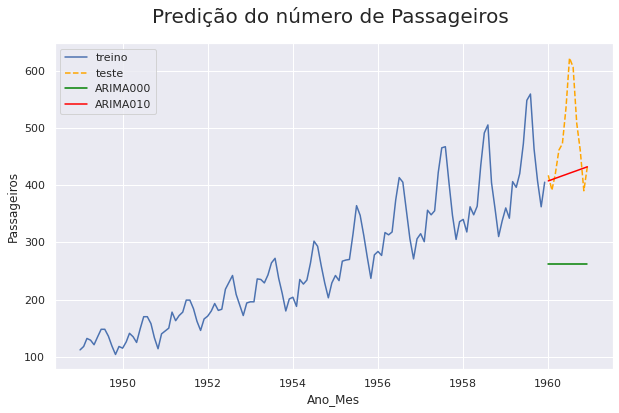

In [83]:
from statsmodels.tsa.arima_model import ARIMA

x_treino = numero_passageiros.query('Ano != 1960')
y_teste = numero_passageiros.query('Ano == 1960')

model_ARIMA000_treinado = ARIMA(x_treino['Passageiros'].values.astype('float32'), order=(0,0,0)).fit()
model_ARIMA010_treinado = ARIMA(x_treino['Passageiros'].values.astype('float32'), order=(0,1,0)).fit()

y_treino000 = model_ARIMA000_treinado.forecast(len(y_teste))[0]
y_treino010 = model_ARIMA010_treinado.forecast(len(y_teste))[0]

ax = sns.lineplot(x='Ano_Mes', y='Passageiros', data=x_treino, label='treino')
ax = sns.lineplot(x='Ano_Mes', y='Passageiros', data=y_teste, linestyle='dashed', color='orange', label='teste')
ax = sns.lineplot(x='Ano_Mes', y=y_treino000, data=y_teste, color='green', label='ARIMA000')
ax = sns.lineplot(x='Ano_Mes', y=y_treino010, data=y_teste, color='red', label='ARIMA010')

ax.set_title('Predição do número de Passageiros ',fontsize=20, pad=20)
ax.figure.set_size_inches(10,6)
ax.legend()
ax;

Note que só o fato de adicionar uma diferencial e integrar a série com o modelo $\text{ARIMA}(0,1,0)$ já da uma diferença significativa. Podemos verificar a derivada da série temporal e também o seu diagrama de fase, afim de verificar que não só a derivada aumenta com o passar dos anos mas também que a amplitude da sua variação também aumenta:

In [84]:
numero_passageiros['Diferenciacao'] = numero_passageiros['Passageiros'].diff()

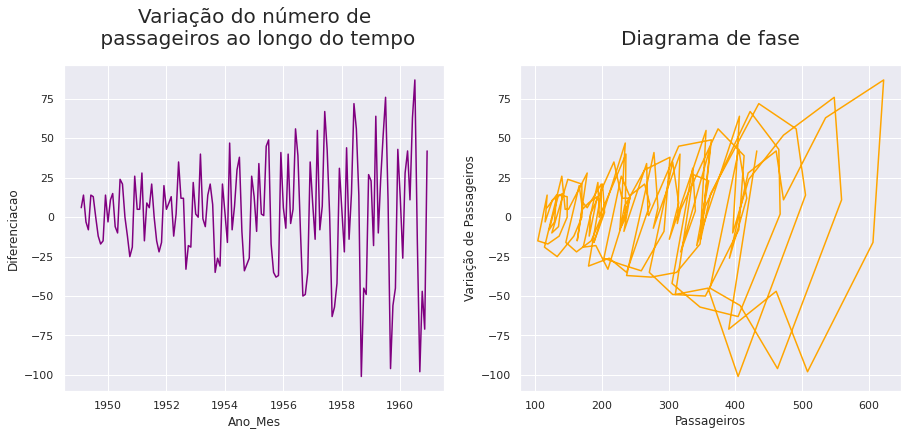

In [85]:
plt.subplot(1,2,1)
ax=sns.lineplot(x='Ano_Mes',y='Diferenciacao', data=numero_passageiros, color='purple')
ax.figure.set_size_inches(15,6)
ax.set_title('Variação do número de\n passageiros ao longo do tempo', fontsize=20, pad=20)


plt.subplot(1,2,2)
plt.plot(numero_passageiros.Passageiros, numero_passageiros.Diferenciacao, color='orange')
plt.title('Diagrama de fase', fontsize=20, pad=20)
plt.xlabel('Passageiros')
plt.ylabel('Variação de Passageiros')
ax;

# Parâmetros $p$ e $q$ do $\text{ARIMA}$

Já adianto que ajustar os parâmetros $p$ e $q$ do $\text{ARIMA}(p,d,q)$ não é um trabalho simples, ainda mais porque envolve diferenciação e integração numérica. Esses parâmetros envolvem tanto o números de elementos que estarão em defasagem para o cáclculo da autocorrelação quanto o tamanho da janela em que será calculada a média móvel.

## Para definir a órdem do $p$

Bom, a técnica mais utilizada é ver o *leg* cujo ocorre o decaimento abrupto da autocorrelação parcial. Veja, no gráfico a direita da figura abaixo que após o segundo *leg* temos o próximo dentro da área de rejeição, então o $p$ mais indicado é $3$ mas veja que após $10$ *legs* também tem uma autocorrelação fora da área de rejeição.

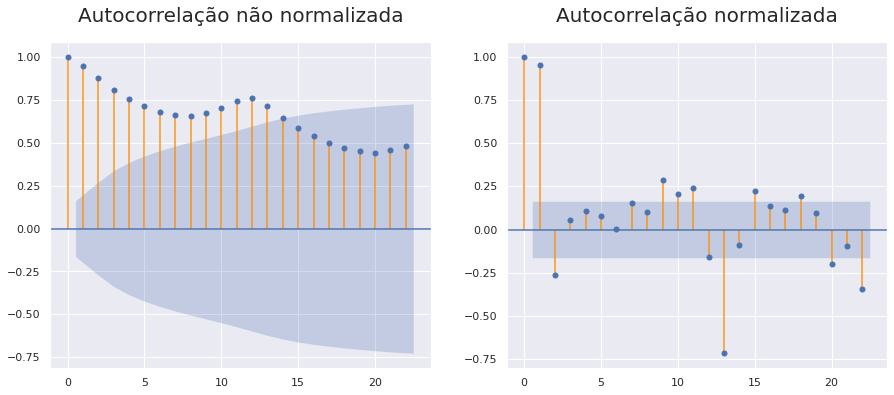

In [86]:
#sns.set_context('talk')
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6),)
plot_acf(numero_passageiros['Passageiros'],vlines_kwargs={'color':'darkorange', 'alpha':0.9}, ax=ax1);
plot_pacf(numero_passageiros['Passageiros'],vlines_kwargs={'color':'darkorange', 'alpha':0.9}, ax=ax2);
ax1.set_title('Autocorrelação não normalizada',fontsize=20, pad=20)
ax2.set_title('Autocorrelação normalizada',fontsize=20, pad=20)
ax;

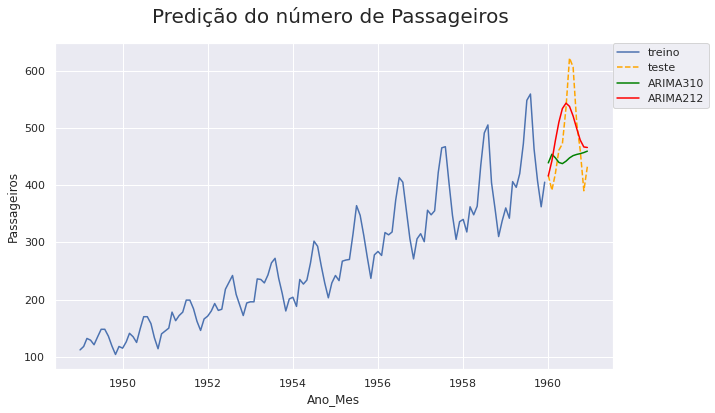

In [87]:
from statsmodels.tsa.arima_model import ARIMA

x_treino = numero_passageiros.query('Ano != 1960')
y_teste = numero_passageiros.query('Ano == 1960')

model_ARIMA310_treinado = ARIMA(x_treino['Passageiros'].values.astype('float32'), order=(3,1,0)).fit()
model_ARIMA212_treinado = ARIMA(x_treino['Passageiros'].values.astype('float32'), order=(2,1,2)).fit()

y_treino310 = model_ARIMA310_treinado.forecast(len(y_teste))[0]
y_treino212 = model_ARIMA212_treinado.forecast(len(y_teste))[0]

ax = sns.lineplot(x='Ano_Mes', y='Passageiros', data=x_treino, label='treino')
ax = sns.lineplot(x='Ano_Mes', y='Passageiros', data=y_teste, linestyle='dashed', color='orange', label='teste')
ax = sns.lineplot(x='Ano_Mes', y=y_treino310, data=y_teste, color='green', label='ARIMA310')
ax = sns.lineplot(x='Ano_Mes', y=y_treino212, data=y_teste, color='red', label='ARIMA212')

ax.set_title('Predição do número de Passageiros ',fontsize=20, pad=20)
ax.figure.set_size_inches(10,6)
ax.legend(loc=(1,0.8))
ax;

> Note que além de adicionar uma diferenciação de primeira ordem, uma autoregressão de segunda ordem e uma média móvel de segunda ordem, temos um ajuste relativamente bom ($\text{ARIMA}(2,1,2)$) se comparado com as outras tentativas. Em outras palavras a média móvel aparentemente corrige a falta de amplitude no modelo.

### Para tuberculose

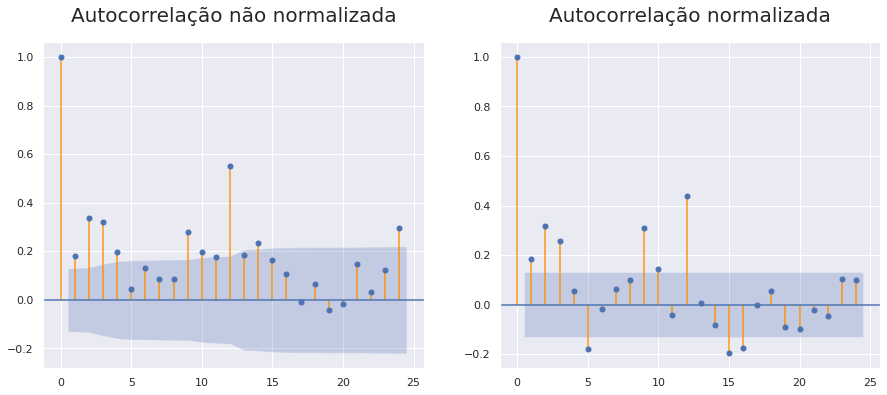

In [88]:
#sns.set_context('talk')
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,6))
plot_acf(casos_tuberculose_ano_mes['Casos'],vlines_kwargs={'color':'darkorange', 'alpha':0.9}, ax=ax1);
plot_pacf(casos_tuberculose_ano_mes['Casos'],vlines_kwargs={'color':'darkorange', 'alpha':0.9}, ax=ax2);
ax1.set_title('Autocorrelação não normalizada',fontsize=20, pad=20)
ax2.set_title('Autocorrelação normalizada',fontsize=20, pad=20)
ax;

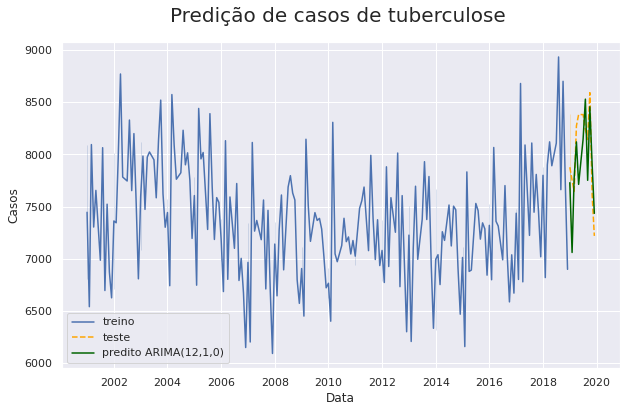

In [89]:
from statsmodels.tsa.arima_model import ARIMA

x_treino = casos_tuberculose_ano_mes.query('Ano != 2019')
y_teste = casos_tuberculose_ano_mes.query('Ano == 2019')

model_ARIMA12_10_treinado = ARIMA(x_treino['Casos'].values.astype('float64'), order=(12,1,0)).fit()

y_treino_ARIMA12_1_0 = model_ARIMA12_10_treinado.forecast(len(y_teste))[0]

ax = sns.lineplot(x='Data', y='Casos', data=x_treino, label='treino')
ax = sns.lineplot(x='Data', y='Casos', data=y_teste,linestyle='dashed', color='orange', label='teste')
ax = sns.lineplot(x='Data', y=y_treino_ARIMA12_1_0, data=y_teste, color='darkgreen', label='predito ARIMA(12,1,0)')

ax.set_title('Predição de casos de tuberculose ',fontsize=20, pad=20)
ax.figure.set_size_inches(10,6)
ax.legend()
ax;

## Ajuda na determinação dos parâmetros do $\text{ARIMA}$ 

Um jeito de força bruta é estimar os parâmetros de forma iterativa, esta técnica foi implementada no módulo `alkaline` do python. Então caso seja necessário intalar o módulo não é muito difícil. 

Dentro deste módulo existe a classe `auto_arima` em que foram implementadas uma série de rotinas que servem para busca de parâmetros, treino e testes de modelo ARIMA. Por exemplo, um dos hiperparâmetros deste objeto é `start_p` que define por onde será iniciada busca.

A estrutura do objeto é: 

```python
pmdarima.arima.auto_arima(y, X=None, start_p=2, d=None, start_q=2, max_p=5, max_d=2, max_q=5, start_P=1,
                          D=None, start_Q=1, max_P=2, max_D=1, max_Q=2, max_order=5, m=1, seasonal=True,
                          stationary=False, information_criterion='aic', alpha=0.05, test='kpss',
                          seasonal_test='ocsb', stepwise=True, n_jobs=1, start_params=None, trend=None,
                          method='lbfgs', maxiter=50, offset_test_args=None, seasonal_test_args=None,
                          suppress_warnings=True, error_action='trace', trace=False, random=False,
                          random_state=None, n_fits=10, return_valid_fits=False, out_of_sample_size=0, 
                          scoring='mse', scoring_args=None, with_intercept='auto', sarimax_kwargs=None,
                          **fit_args)
```

Dentre esses hiper parâmetros podemos identificar quais são os critérios de análise, por exemplo, o melhor conjunto de parâmetros por padrão é aquele que tem o $MSE$ (Mean Squares Errors).

https://alkaline-ml.com/pmdarima/modules/generated/pmdarima.arima.auto_arima.html

In [90]:
from pmdarima.arima import auto_arima

In [91]:
x_treino = casos_tuberculose_ano_mes.query('Ano != 2019')
y_teste = casos_tuberculose_ano_mes.query('Ano == 2019')

modelo_auto_arima = auto_arima(x_treino['Casos'].values, error_action='ignore',
                               trace=True,seasonal=True, max_p=12, max_P=12, max_q=2, max_Q=2, m=12)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.40 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3451.747, Time=0.01 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3285.401, Time=0.30 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3255.451, Time=0.57 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3449.761, Time=0.01 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=3310.531, Time=0.10 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=3219.447, Time=1.28 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=3238.628, Time=0.41 sec
 ARIMA(0,1,1)(2,0,1)[12] intercept   : AIC=inf, Time=2.81 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=inf, Time=3.61 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=3251.931, Time=1.76 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=3237.507, Time=1.51 sec
 ARIMA(0,1,1)(2,0,2)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(1,1,1)(1,0,1)[12] intercept   : AIC=32

Aqui temos o resultado do modelo. Note que existe uma coluna chamada `AIC`, que é a sigla para ***Critério de Informação de Akaike***, quando menor o valor de AIC melhor é o modelo.

**Fundamentação teórica**:

> O `AIC` é fundamentado na teoria da informação. Quando um modelo estatístico é usado para representar um determinado processo, a representação nunca será exata, ou seja, o modelo nunca será perfeito e certamente algumas informações serão perdidas. O AIC estima a quantidade relativa de informações perdidas por um determinado modelo: quanto menos informações um modelo perde, maior a qualidade desse modelo e menor a pontuação AIC. 

> Ao estimar a quantidade de informação perdida por um modelo, o AIC lida com o *trade-off* entre a qualidade do ajuste do modelo e a simplicidade. Em outras palavras, o critério de AIC lida com o risco de **overfitting** e o risco de **underfitting**

> O critério de informação de Akaike recebe este nome em homenagem ao estatístico japones [Hirotugu Akaike](https://en.wikipedia.org/wiki/Hirotugu_Akaike) que formulou este critério de decisão. Este critério serva de base para várias tomadas de decisão em inferências estatísticas modernas.

In [92]:
modelo_auto_arima.predict(n_periods=12)

array([8166.93354861, 7733.81823903, 7431.75265601, 8391.00381205,
       7987.22619814, 8064.02820973, 8019.05785479, 8442.23126699,
       7932.06847029, 8161.34884436, 7843.179402  , 7424.22439448])

In [93]:
from statsmodels.tsa.arima_model import ARIMA

x_treino = casos_tuberculose_ano_mes.query('Ano != 2019')
y_teste = casos_tuberculose_ano_mes.query('Ano == 2019')

y_treino_auto_ARIMA = modelo_auto_arima.predict(n_periods=len(y_teste))

model_ARIMA12_10_treinado = ARIMA(x_treino['Casos'].values.astype('float32'), order=(12,1,2)).fit()
y_treino_ARIMA12_1_0 = model_ARIMA12_10_treinado.forecast(len(y_teste))[0]

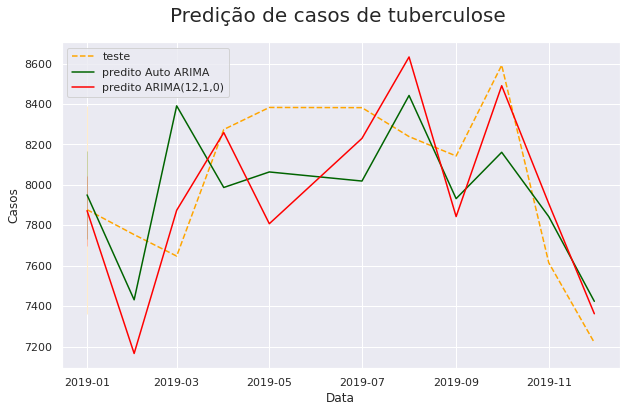

In [94]:
ax = sns.lineplot(x='Data', y='Casos', data=y_teste,linestyle='dashed', color='orange', label='teste')
ax = sns.lineplot(x='Data', y=y_treino_auto_ARIMA, data=y_teste, color='darkgreen', label='predito Auto ARIMA')
ax = sns.lineplot(x='Data', y=y_treino_ARIMA12_1_0, data=y_teste, color='red', label='predito ARIMA(12,1,0)')

ax.set_title('Predição de casos de tuberculose ',fontsize=20, pad=20)
ax.figure.set_size_inches(10,6)
ax.legend()
ax;

> Agora temos dois modelos treinados, como comparar qual é o melhor modelo? Bom, pra decidir isso é necessário escolher uma métrica de comparação de erros em relação aos dados de teste. Note, o critério $AIC$ é calculado em relação aos dados de treino e o que queremos prever na realidade são dados que o modelo nunca viu, que no caso são os dados de teste.

> Uma métrica muito utilizada é o MSE (Mean Square Error).

In [95]:
from sklearn.metrics import mean_squared_error

In [96]:
resultado_ARIMA_12_1_0 = mean_squared_error(y_teste['Casos'], y_treino_ARIMA12_1_0)
resultado_Auto_ARIMA = mean_squared_error(y_teste['Casos'], y_treino_auto_ARIMA)

print(f'Resultado ARIMA(12,1,0): {resultado_ARIMA_12_1_0.round()}')
print(f'Resultado Auto ARIMA: {resultado_Auto_ARIMA.round()}')

Resultado ARIMA(12,1,0): 171225.0
Resultado Auto ARIMA: 201346.0


# Previsão com Prophet

A descrição da ferramenta do Facebook chamada Prophet é bem concisa:

> Prophet is a Python microframework for financial markets. Prophet strives to let the programmer focus on modeling financial strategies, portfolio management, and analyzing backtests. It achieves this by having few functions to learn to hit the ground running, yet being flexible enough to accomodate sophistication.

Prophet: https://facebook.github.io/prophet/

O que torna o Prophet tão popular? Bom assim como o [Keras](https://keras.io/) funciona em cima do [TensorFlow](https://www.tensorflow.org/) que funciona com base no [Theano](https://en.wikipedia.org/wiki/Theano_(software)) o Prophet é baseado numa plataforma de modelagem estatistica chamada [Stan](https://mc-stan.org/). O Stan tem inúmeras rotinas de cáclculos e modelos estatisticos já implementados e o Prophet consegue deixa-los acessíveis tanto em Python quando em R.